In [1]:
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import os 
from PIL import Image
plt.style.use('ggplot')
import numpy as np
%matplotlib inline

/Users/nimamaghoul/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/nimamaghoul/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
%%time
ellipse = 'Galaxies/Galaxy_Color_Images/Ellipse_Images/'
spiral = 'Galaxies/Galaxy_Color_Images/Spiral_Images/'
path_sp = os.listdir(spiral)
path_el = os.listdir(ellipse)

##### Building a Training Data
print("Building the Training Data")
el_train = []
for i in range(len(path_el)/2+1,len(path_el)/2+10001 ):
    im = Image.open(ellipse + path_el[i])
    el_train.append(np.ravel(im.getdata()))
sp_train = [] 
for i in range(len(path_sp)/2+1,len(path_sp)/2+10001):
    im = Image.open(spiral + path_sp[i])
    sp_train.append(np.ravel(im.getdata()))
## Creating a training set
y_el_train = []
y_sp_train = []
for i in range(0,len(el_train)):
    y_el_train.append(0)
for i in range(0,len(sp_train)):
    y_sp_train.append(1)
X_train = el_train + sp_train
y_train = y_el_train + y_sp_train
print('Training Data Completed')

#### Creating Test set ######
print('Building the Testing Data')
el_test = []
for i in range(201, 250):
    im = Image.open(ellipse + path_el[i])
    el_test.append(np.ravel(im.getdata()))

sp_test = []
for i in range(201, 250):
     im = Image.open(spiral + path_sp[i])
     sp_test.append(np.ravel(im.getdata()))

X_test = el_test + sp_test
y_true = []
for i in range(len(el_test)):
    y_true.append(0)
for i in range(len(sp_test)):
    y_true.append(1)
print('Testing Data Completed')



del sp_test
del el_test
del el_train
del sp_train

In [ ]:
for i in range(len(path_el)/2+1,len(path_el)/2+10001 ):
    im = Image.open(ellipse + path_el[i])
    el_train.append(np.ravel(im.getdata()))
sp_train = [] 
for i in range(len(path_sp)/2+1,len(path_sp)/2+10001):
    im = Image.open(spiral + path_sp[i])
    sp_train.append(np.ravel(im.getdata()))

In [793]:
objid

objid
0      587722952231027049
1      587722952231027067
2      587722952767242437
3      587722952767242546
4      587722952767439331
5      587722952767570441
6      587722952767766870
7      587722952767898051
8      587722953303916807
9      587722953303917016
10     587722953303917096
11     587722953304375673
12     587722953304572015
13     587722953841639724
14     587722954109157641
15     587722981733564662
16     587722981733630021
17     587722981735268461
18     587722981736185996
19     587722981736644729
20     587722981736906813
21     587722981738414167
22     587722981738414203
23     587722981738807434
24     587722981739528262
25     587722981739593811
26     587722981739593849
27     587722981739855982
28     587722981740118096
29     587722981740118157
...                   ...
19970  587725818574209304
19971  587725818574209324
19972  587725818574209351
19973  587725818574274701
19974  587725818574274829
19975  587725818574405847
19976  587725818574602422
19977  587725818574667928
19978  587725818574799066
19979  587725818574799083
19980  587725818574995633
19981  587725818575257839
19982  587725818575257861
19983  587725818575323211
19984  587725818575388801
19985  587725818575388893
19986  587725818575388920
19987  587725818575519968
19988  587725818835894428
19989  587725819088404747
19990  587725819089059997
19991  587725819089322240
19992  587725819089453131
19993  587725819089584289
19994  587725819090108533
19995  587725819090174115
19996  587725819090174133
19997  587725819090174173
19998  587725819090567350
19999  587725819090698299

[20000 rows x 1 columns]

In [792]:
import re
objid = pd.DataFrame(path_el[len(path_el)/2+1:len(path_el)/2+10001] + path_sp[len(path_sp)/2+1:len(path_sp)/2+10001], columns=['objid'])
objid.objid = objid.objid.str.replace('.jpg','')

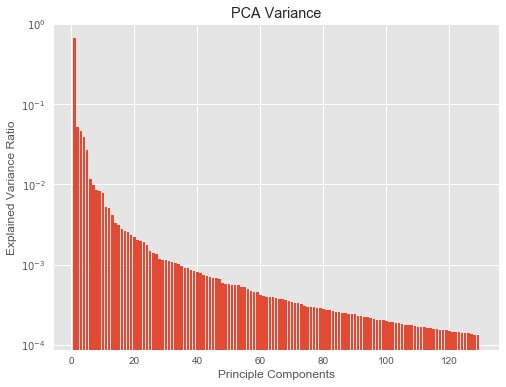

In [244]:
plt.figure(figsize=(8,6))
plt.bar(np.arange(1,130),pcar.explained_variance_ratio_)
plt.yscale('log')
plt.xlabel('Principle Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Variance')
plt.show()


In [237]:
pcar.explained_variance_ratio_.sum()

0.95006717011145536

In [2]:
ellipse = 'Galaxies/Galaxy_Color_Images/Ellipse_Images/'
spiral = 'Galaxies/Galaxy_Color_Images/Spiral_Images/'
path_sp = os.listdir(spiral)
path_el = os.listdir(ellipse)

In [ ]:
def array2topic(data_array, label):#  predicted_l = None, true_l = None):
    plt.figure(figsize = (2,2)).text(.5, .05,label + ' ' +  str(data_array), ha = 'center')
    fig = plt.imshow(np.uint8(pca_2d.inverse_transform(data_array).reshape(100,100,3)))
    plt.axes().get_yaxis().set_visible(False)
    plt.axes().get_xaxis().set_visible(False)
    return fig

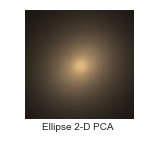

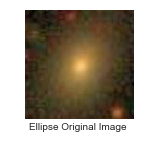

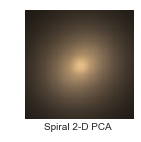

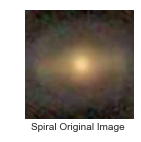

In [329]:
plt.figure(figsize=(2,2)).text(.5,0.05, 'Ellipse 2-D PCA', ha = 'center')
plt.imshow(np.uint8(pca_2d.inverse_transform(pca2[2]).reshape(100,100,-3)))
plt.grid('off')
plt.axis('off')
plt.show()

plt.figure(figsize=(2,2)).text(.5,0.05, 'Ellipse Original Image', ha = 'center')
plt.imshow(np.uint8(X_train[2].reshape(100,100,3)))
plt.grid('off')
plt.axis('off')
plt.show()

plt.figure(figsize=(2,2)).text(.5,0.05, 'Spiral 2-D PCA', ha = 'center')
plt.imshow(np.uint8(pca_2d.inverse_transform(pca2[19984]).reshape(100,100,-3)))
plt.grid('off')
plt.axis('off')
plt.show()

plt.figure(figsize=(2,2)).text(.5,0.05, 'Spiral Original Image', ha = 'center')
plt.imshow(np.uint8(X_train[19984].reshape(100,100,3)))
plt.grid('off')
plt.axis('off')
plt.show()

In [335]:
pcar.inverse_transform(Xredred[3])

array([ 7.25742366,  7.87786043,  5.87963841, ...,  7.56075231,
        7.48310464,  4.90687075])

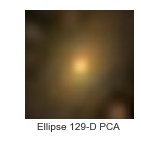

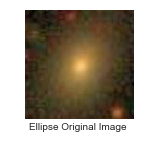

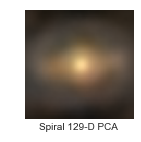

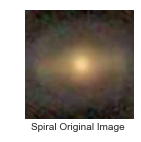

In [337]:
plt.figure(figsize=(2,2)).text(.5,0.05, 'Ellipse 129-D PCA', ha = 'center')
plt.imshow(np.uint8(pcar.inverse_transform(Xredred[2]).reshape(100,100,-3)))
plt.grid('off')
plt.axis('off')
plt.show()

plt.figure(figsize=(2,2)).text(.5,0.05, 'Ellipse Original Image', ha = 'center')
plt.imshow(np.uint8(X_train[2].reshape(100,100,3)))
plt.grid('off')
plt.axis('off')
plt.show()

plt.figure(figsize=(2,2)).text(.5,0.05, 'Spiral 129-D PCA', ha = 'center')
plt.imshow(np.uint8(pcar.inverse_transform(Xredred[19984]).reshape(100,100,-3)))
plt.grid('off')
plt.axis('off')
plt.show()

plt.figure(figsize=(2,2)).text(.5,0.05, 'Spiral Original Image', ha = 'center')
plt.imshow(np.uint8(X_train[19984].reshape(100,100,3)))
plt.grid('off')
plt.axis('off')
plt.show()

In [729]:
pd.Series(pred == knn_pred).value_counts()

True     2703
False    1297
dtype: int64

Building the Training Data
Training Data Completed
Building the Testing Data
Testing Data Completed
CPU times: user 3min 33s, sys: 10.2 s, total: 3min 43s
Wall time: 3min 55s


In [7]:
# from sklearn.utils import shuffle
# #from sklearn.preprocessing import scale
# #X_train, y_train  = shuffle(np.array(X_train), np.array(y_train))
# #scaler = MinMaxScaler()


In [167]:
from sklearn.ensemble import RandomForestClassifier
modRF = RandomForestClassifier()
kfmod = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kfmod.split(mod):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_trmod, X_tsmod = mod[train_index], mod[test_index]
    y_trmod, y_tsmod = np.array(y_train)[train_index], np.array(y_train)[test_index]
    modRF.fit(X_trmod, y_trmod)
    print(modRF.score(X_tsmod, y_tsmod))

0.52225
0.51725
0.508
0.50375
0.517


In [782]:
import pandas as pd
a = pd.read_csv('/Users/nimamaghoul/Downloads/GalaxyZoo1_DR_table2.csv')

In [840]:
pd.Series(elandsp_ordered['P_CS_DEBIASED'] + elandsp_ordered['P_EL_DEBIASED']).value_counts()

1.000    5977
1.000     362
0.966     239
0.968     208
0.963     193
0.967     191
0.970     169
0.960     161
0.958     149
0.964     148
0.964     140
0.965     129
0.962     128
0.971     128
0.969     124
0.962     119
0.972     113
0.982     113
0.969     109
0.889     108
0.900     106
0.926     106
0.965     105
0.961     104
0.939     103
0.980     102
0.929     101
0.956     100
0.957      99
0.909      99
         ... 
0.854       1
0.835       1
0.816       1
0.948       1
0.921       1
0.865       1
0.942       1
0.933       1
0.890       1
0.848       1
0.945       1
0.841       1
0.868       1
0.876       1
0.814       1
0.837       1
0.842       1
0.933       1
0.910       1
0.870       1
0.837       1
0.939       1
0.958       1
0.830       1
0.840       1
0.970       1
0.949       1
0.835       1
0.879       1
0.937       1
dtype: int64

In [804]:
elandsp = a[a['OBJID'].isin(pd.to_numeric(objid.objid))]
sorterIndex = dict(zip(pd.to_numeric(objid.objid), range(len(objid.objid))))

In [807]:
elandsp['Tm_Rank'] = elandsp['OBJID'].map(sorterIndex)

/Users/nimamaghoul/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [810]:
elandsp_ordered = elandsp.sort(['Tm_Rank'], ascending = ['True']).reset_index(drop= True, inplace=False)

/Users/nimamaghoul/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [812]:
elandsp_ordered.head()

OBJID           RA          DEC  NVOTE   P_EL  P_CW  P_ACW  \
0  587722952231027049  15:52:45.30  -00:33:30.0     37  0.973   0.0  0.000   
1  587722952231027067  15:52:47.11  -00:30:06.3     54  0.889   0.0  0.000   
2  587722952767242437  15:47:00.42  -00:03:22.8     35  0.914   0.0  0.029   
3  587722952767242546  15:47:13.73  -00:08:31.9     66  0.879   0.0  0.000   
4  587722952767439331  15:48:48.53  -00:00:01.6     30  0.867   0.0  0.000   

   P_EDGE   P_DK   P_MG   P_CS  P_EL_DEBIASED  P_CS_DEBIASED  SPIRAL  \
0   0.000  0.027  0.000  0.000          0.973          0.000       0   
1   0.037  0.074  0.000  0.037          0.881          0.045       0   
2   0.029  0.029  0.000  0.057          0.914          0.057       0   
3   0.045  0.076  0.000  0.045          0.879          0.045       0   
4   0.067  0.033  0.033  0.067          0.867          0.067       0   

   ELLIPTICAL  UNCERTAIN  Tm_Rank  
0           1          0        0  
1           1          0        1  
2           1          0        2  
3           1          0        3  
4           1          0        4

In [286]:
%%time
pca_2d = PCA(n_components = 2)
pca2 = pca_2d.fit_transform(X_train)
color_trains = []
color_label = []
for label in y_train:
    if label == 1: ## Spiral
        color_trains.append('blue')
        color_label.append('Spiral')
        
    else: ## Ellipse 
        color_trains.append('red')
        color_label.append('Elliptical')


CPU times: user 1min 31s, sys: 1min 8s, total: 2min 40s
Wall time: 3min 2s


In [276]:
def arraytopic(data_array):#,  predicted_l = None, true_l = None):
    plt.figure(figsize = (2,2))#.text(.5, .05,'P: ' +predicted_l + ' T: ' + true_l , ha = 'center')
    fig = plt.imshow(np.uint8(pca_2d.inverse_transform(data_array).reshape(100,100,3)))
    plt.axes().get_yaxis().set_visible(False)
    plt.axes().get_xaxis().set_visible(False)
    return fig

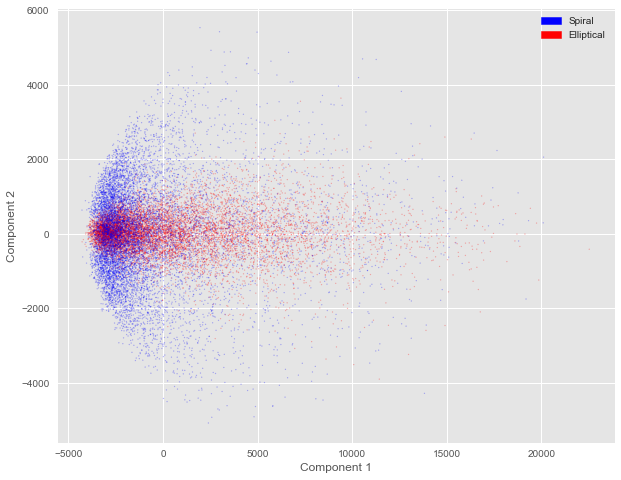

In [22]:
import matplotlib.patches as mpatches
plt.figure(figsize=(10,8))
red_patch = mpatches.Patch(color = 'blue', label = 'Spiral')
blue_patch = mpatches.Patch(color = 'red', label = 'Elliptical')
plt.scatter(pca2.T[0], pca2.T[1], color = color_trains, s = .8, alpha= 0.2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid('on')

plt.legend(handles = [red_patch, blue_patch])
plt.show()

In [23]:
pca_2d.inverse_transform(pca2[0]), pca_2d.inverse_transform(pca2[1])

(array([ 18.50076221,  15.95691709,  12.09603736, ...,  19.84997444,
         16.98801992,  12.93537675]),
 array([ 11.71512711,  10.52240356,   7.76934073, ...,  12.49133637,
         11.09377978,   8.14006992]))

In [338]:
1+1

2

[-1997.88912702  -717.02928823]


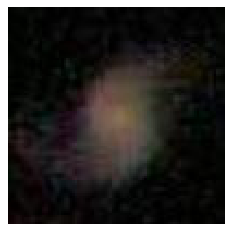

[ 2398.87252885  -179.55194112]


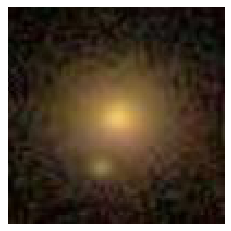

In [27]:
plt.imshow(np.uint8(X_train[12600].reshape(100,100,3)))
plt.axes().get_yaxis().set_visible(False)
plt.axes().get_xaxis().set_visible(False)
print(pca2[12600])
plt.show()
plt.imshow(np.uint8(X_train[0].reshape(100,100,3)))
plt.axes().get_yaxis().set_visible(False)
plt.axes().get_xaxis().set_visible(False)
print(pca2[0])
plt.show()

[-1997.88912702  -717.02928823]


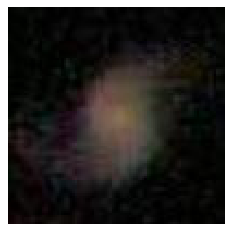

[ 2398.87252885  -179.55194112]


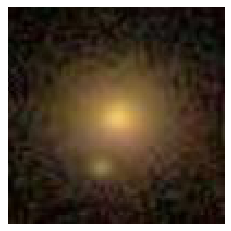

In [25]:
plt.imshow(np.uint8(X_train[12600].reshape(100,100,3)))
plt.axes().get_yaxis().set_visible(False)
plt.axes().get_xaxis().set_visible(False)
print(pca2[12600])
plt.show()
plt.imshow(np.uint8(X_train[0].reshape(100,100,3)))
plt.axes().get_yaxis().set_visible(False)
plt.axes().get_xaxis().set_visible(False)
print(pca2[0])
plt.show()

In [246]:
def array2topic(data_array, label):#  predicted_l = None, true_l = None):
    plt.figure(figsize = (2,2)).text(.5, .05,label + ' ' +  str(data_array), ha = 'center')
    fig = plt.imshow(np.uint8(pcar.inverse_transform(data_array).reshape(100,100,3)))
    plt.axes().get_yaxis().set_visible(False)
    plt.axes().get_xaxis().set_visible(False)
    return fig


In [140]:
%%time
from sklearn.manifold import TSNE
model = TSNE(n_components = 2, random_state=42)
mod = model.fit_transform(X_train)


CPU times: user 4h 11min 45s, sys: 4min 18s, total: 4h 16min 3s
Wall time: 4h 8min 59s


In [298]:
%%time
#modelscaled = model.fit_transform(scaler(X_train))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


In [149]:
%%time
print 'TSNE DONE!'
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
mod_scaled = scaler.fit_transform(mod)

TSNE DONE!
CPU times: user 2.43 ms, sys: 1.03 ms, total: 3.46 ms
Wall time: 2.51 ms


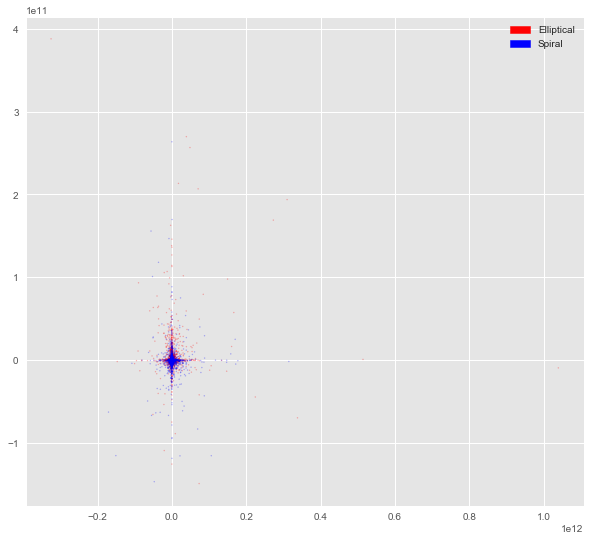

In [347]:
from matplotlib import patches as mpatches
plt.figure(figsize=(10,9))
red_patch = mpatches.Patch(color = 'red', label = 'Elliptical')
blue_patch = mpatches.Patch(color = 'blue', label = 'Spiral')
plt.scatter(mod.T[0], mod.T[1], s=1, color = color_trains, alpha= 0.2)
plt.grid('on')
plt.legend(handles = [red_patch, blue_patch])
# plt.xscale('symlog')
# plt.yscale('symlog')
# plt.xlim(.2375,.2385)
# plt.ylim(.274,.28)
plt.show()




In [12]:
from sklearn.preprocessing import scale
model = TSNE(n_components = 2)
mod = model.fit_transform(scale(X_train))

In [667]:
# from matplotlib import patches as mpatches
# plt.figure(figsize=(10,9))
# red_patch = mpatches.Patch(color = 'red', label = 'Elliptical')
# blue_patch = mpatches.Patch(color = 'blue', label = 'Spiral')
# plt.scatter(mod.T[0], mod.T[1], color = color_trains, s = .1, alpha= 0.2)
# plt.grid('on')
# plt.legend(handles = [red_patch, blue_patch])
# plt.xscale('symlog')
# plt.yscale('symlog')
# plt.show()


In [359]:
from sklearn.ensemble import RandomForestClassifier

svmtsne = SVC()
rftsne = RandomForestClassifier()
gnbtsne = GaussianNB()
lrtsne = LogisticRegression()
knntsne = KNeighborsClassifier()
mlptsne = MLPClassifier()
kf = KFold(n_splits = 5, shuffle=True)
for train_index, test_index in kf.split(mod):
    Xtsnetr, Xtsnets = mod[train_index], mod[test_index]
    ytsnetr, ytsnets = np.array(y_train)[train_index], np.array(y_train)[test_index]
    svmtsne.fit(Xtsnetr, ytsnetr)
    rftsne.fit(Xtsnetr, ytsnetr)
    gnbtsne.fit(Xtsnetr,ytsnetr)
    lrtsne.fit(Xtsnetr,ytsnetr)
    knntsne.fit(Xtsnetr, ytsnetr)
    mlptsne.fit(Xtsnetr, ytsnetr)
   # linr16.fit(Xtr,ytr)
    #svm16l.fit(Xtr, ytr)
    print('SVMR ',svmtsne.score(Xtsnets, ytsnets))
    print('RF ', rftsne.score(Xtsnets,ytsnets))
    print('GNB ', gnbtsne.score(Xtsnets,ytsnets))
    print('LR ', lrtsne.score(Xtsnets,ytsnets))
    print('KNN ', knntsne.score(Xtsnets,ytsnets))
    print('MLP', mlptsne.score(Xtsnets,ytsnets))
   # print('Linreg',linr16.score(Xts,yts))

('SVMR ', 0.4995)
('RF ', 0.50600000000000001)
('GNB ', 0.50124999999999997)
('LR ', 0.53400000000000003)
('KNN ', 0.51249999999999996)
('MLP', 0.49199999999999999)
('SVMR ', 0.48899999999999999)
('RF ', 0.51875000000000004)
('GNB ', 0.495)
('LR ', 0.51775000000000004)
('KNN ', 0.52124999999999999)
('MLP', 0.50524999999999998)
('SVMR ', 0.4955)
('RF ', 0.51100000000000001)
('GNB ', 0.50800000000000001)
('LR ', 0.54025000000000001)
('KNN ', 0.51775000000000004)
('MLP', 0.53474999999999995)
('SVMR ', 0.49975000000000003)
('RF ', 0.50775000000000003)
('GNB ', 0.50124999999999997)
('LR ', 0.53274999999999995)
('KNN ', 0.50424999999999998)
('MLP', 0.47475000000000001)
('SVMR ', 0.49375000000000002)
('RF ', 0.51300000000000001)
('GNB ', 0.51200000000000001)
('LR ', 0.53549999999999998)
('KNN ', 0.50924999999999998)
('MLP', 0.50900000000000001)


In [362]:
%%time

#Lets Try PCA in 16 Dims 
from sklearn.decomposition import PCA 
from sklearn.model_selection import KFold
from sklearn.svm import SVC
pca16 = PCA(n_components=16)
X16 = pca16.fit_transform(X_train)

    
    


CPU times: user 1min 55s, sys: 1min 19s, total: 3min 14s
Wall time: 3min 58s


In [363]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
linr16 = LinearRegression()
lr16 = LogisticRegression()
rf16 = RandomForestClassifier()
gnb16 = GaussianNB()
svm16 = SVC(kernel='linear')
knn16 = KNeighborsClassifier(n_neighbors = 5)
mlp16 = MLPClassifier()

# REDUCED RANDOMIZED PCA

In [5]:
%%time
# print('Fitting')
pcaredred = PCA()
pcaredred.fit(X_train)
print('Done Fitting')
cumsum = np.cumsum(pcaredred.explained_variance_ratio_)
cumsum, cumsum.shape
d = np.argmax(cumsum >= 0.95) + 1
print(d)

Done Fitting
129
CPU times: user 5h 15min 32s, sys: 12min 5s, total: 5h 27min 37s
Wall time: 2h 46min 15s


In [9]:
%%time
pcar = PCA(n_components=d, svd_solver='randomized', whiten=True)
Xredred = pcar.fit_transform(np.array(X_train))
print 'Done'

Done
CPU times: user 4min 36s, sys: 1min 26s, total: 6min 2s
Wall time: 4min 21s


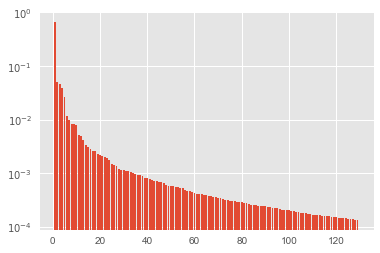

In [763]:
plt.bar(np.arange(1, len(pcar.explained_variance_)+1), pcar.explained_variance_ratio_)
plt.yscale('log')

In [493]:
# %%time
# d = np.argmax(cumsum >= 0.95) + 1
# print(d)
# pca = PCA(n_components=0.95)#, svd_solver='randomized', whiten=True)
# X_reduced = pca.fit_transform(X_train)
# print 'Done'

In [ ]:
print 'The Shape: '
Xredred.shape

In [ ]:
# print('PCA RANDOM ')
# pcared = PCA()
# pcared.fit(X_train)
# print('Done Fitting')
# cumsum = np.cumsum(pcared.explained_variance_ratio_)
# cumsum, cumsum.shape
# pcared = PCA(n_components=0.95, svd_solver='randomized', whiten=True)
# X_redred= pcared.fit_transform(X_train)

PCA RANDOM 


<Container object of 129 artists>

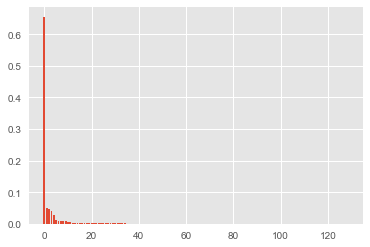

In [45]:
X_reduced.shape
np.linspace(0.01,10,20)
plt.bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)


# PCA with SVM

In [495]:
%%time 
### SVM
print Xredred.shape
from sklearn.utils import shuffle
# c = np.linspace(0.01,10,20)

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
# X_red_shuffle, X_red_shuffle_ts, y_shuf_tr, y_shuf_ts = \
#         train_test_split(Xredred, y_train, test_size = 0.0, random_state=42)
kfs = KFold(n_splits=5 , shuffle=True, random_state=343)
for train_index, test_index in kfs.split(X_red_shuffle):
    accuracy =[]
    X_tr, X_ts = Xredred[train_index], Xredred[test_index]
    y_tr, y_ts = np.array(y_train)[train_index], np.array(y_train)[test_index]
    print('FITTING: ')
    svm = SVC(kernel='rbf', C = 2.5, gamma = .01)
    svm.fit(X_tr,y_tr)
    svm_pred = svm.predict(X_ts)
    print('SCORING!: ')
    print clf.score(X_ts, y_ts)
    accuracy.append(accuracy_score(y_ts,clf.predict(X_ts)))
    



(20000, 129)
FITTING: 
SCORING!: 
0.945
FITTING: 
SCORING!: 
0.93475
FITTING: 
SCORING!: 
0.938
FITTING: 
SCORING!: 
0.93675
FITTING: 
SCORING!: 
0.93925
CPU times: user 6min 27s, sys: 4.25 s, total: 6min 31s
Wall time: 6min 41s


In [14]:
%%time
best_score = 0  
best_params = {'C': None, 'gamma': None}
from random import randint
import random

#for a preset number of iterations
for i in range(20):
    #try random values for each hyperparameter
    c = random.choice(np.linspace(0.01,2.5,20))
    g = random.choice(np.linspace(0.01,2.5,20))
    svc = svm.SVC(C= c, gamma = g)
    svc.fit(X_tr, y_tr)
    score = svc.score(X_ts, y_ts)
    print('Trial: ', i)
    if score > best_score:
        best_score = score
        best_params['C'] = c
        best_params['gamma'] = g
    print(best_score, best_params )
    
    

('Trial: ', 0)
(0.48899999999999999, {'C': 2.1068421052631581, 'gamma': 1.0584210526315792})
('Trial: ', 1)
(0.48899999999999999, {'C': 2.1068421052631581, 'gamma': 1.0584210526315792})
('Trial: ', 2)
(0.48899999999999999, {'C': 2.1068421052631581, 'gamma': 1.0584210526315792})
('Trial: ', 3)
(0.48899999999999999, {'C': 2.1068421052631581, 'gamma': 1.0584210526315792})
('Trial: ', 4)
(0.48899999999999999, {'C': 2.1068421052631581, 'gamma': 1.0584210526315792})
('Trial: ', 5)
(0.48899999999999999, {'C': 2.1068421052631581, 'gamma': 1.0584210526315792})
('Trial: ', 6)
(0.48899999999999999, {'C': 2.1068421052631581, 'gamma': 1.0584210526315792})
('Trial: ', 7)
(0.48899999999999999, {'C': 2.1068421052631581, 'gamma': 1.0584210526315792})
('Trial: ', 8)
(0.48899999999999999, {'C': 2.1068421052631581, 'gamma': 1.0584210526315792})
('Trial: ', 9)
(0.48899999999999999, {'C': 2.1068421052631581, 'gamma': 1.0584210526315792})
('Trial: ', 10)
(0.48899999999999999, {'C': 2.1068421052631581, 'gamma

Starting
('The best classifier is: ', SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))


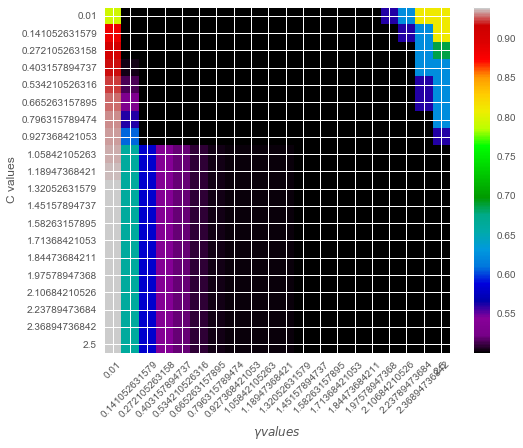

In [52]:
%%time
C_range = np.linspace(0.01,2.5,20)
gamma_range = np.linspace(0.01,2.5,20)
print('Starting')
param_grid = dict(gamma=gamma_range, C=C_range)

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=StratifiedKFold(y=y_train, n_folds = 5))

grid.fit(X_reduced, y_train)

print("The best classifier is: ", grid.best_estimator_)

# plot the scores of the grid
# grid_scores_ contains parameter settings and scores
score_dict = grid.grid_scores_

# We extract just the scores
scores = [x[1] for x in score_dict]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

# Make a nice figure
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.spectral)
plt.xlabel('$\gamma values$')
plt.ylabel('C values')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.show()

In [22]:
import pandas as pd
pd.DataFrame(Xredred).to_csv('PCA129.csv')
pd.DataFrame(y_train).to_csv('PCA129labels.csv')

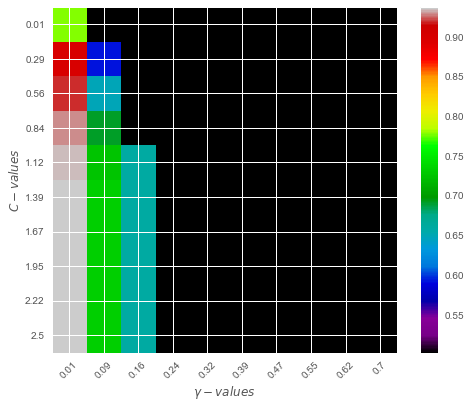

CPU times: user 489 ms, sys: 19.6 ms, total: 508 ms
Wall time: 515 ms


In [138]:
%%time
## New 1-27-2018
C_range = np.round(np.linspace(0.01,2.5,10),2)
gamma_range = np.round(np.linspace(0.01,0.7,10),2)
print('Starting')
param_grid = dict(gamma=gamma_range, C=C_range)

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=StratifiedKFold(y=y_tr, n_folds = 5), n_jobs=3)

grid.fit(X_tr, y_tr)

print("The best classifier is: ", grid.best_estimator_)

# plot the scores of the grid
# grid_scores_ contains parameter settings and scores
score_dict = grid.grid_scores_

# We extract just the scores
scores = [x[1] for x in score_dict]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))
# Make a nice figure
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.spectral)
plt.xlabel('$\gamma-values$')
plt.ylabel('$C-values$')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), np.round(gamma_range,2), rotation=45)
plt.yticks(np.arange(len(C_range)), np.round(C_range,2))
plt.show()

In [837]:
pd.Series(elandsp_ordered['P_EL'] + elandsp_ordered['P_DK']).value_counts()

1.000    2212
0.000     720
0.967     164
0.966     156
0.970     153
0.963     133
0.500     125
0.968     120
0.889     108
1.000     104
0.965     103
0.923     102
0.250     100
0.935      95
0.917      92
0.931      89
0.900      87
0.929      83
0.926      83
0.969      82
0.960      81
0.958      80
0.971      79
0.969      79
0.909      76
0.143      75
0.939      74
0.961      72
0.125      72
0.964      70
         ... 
0.157       1
0.447       1
0.288       1
0.684       1
0.384       1
0.862       1
0.487       1
0.891       1
0.456       1
0.839       1
0.354       1
0.230       1
0.428       1
0.438       1
0.216       1
0.196       1
0.699       1
0.120       1
0.566       1
0.983       1
0.596       1
0.449       1
0.431       1
0.681       1
0.582       1
0.654       1
0.578       1
0.141       1
0.633       1
0.803       1
dtype: int64

In [850]:
def plotprobs(model_probpred, datatable):
    plt.figure(figsize=(8,6))
    plt.scatter(model_probpred.T[1],1-np.array(datatable.loc[test_index]['P_EL_DEBIASED']), s= 0.1)
    plt.xlabel('P(Spiral)')
    plt.ylabel('1 - P(Ellipse) Galaxy Zoo')
    plt.show()
    plt.figure(figsize=(8,6))
    plt.scatter(model_probpred.T[0],np.array(datatable.loc[test_index]['P_CS_DEBIASED']), s= 0.1)
    plt.xlabel('P(Ellipse)')
    plt.ylabel('1 - P(Spiral) Galaxy Zoo')
    plt.show()

    


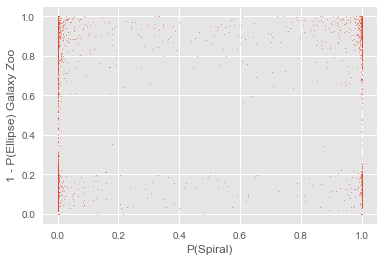

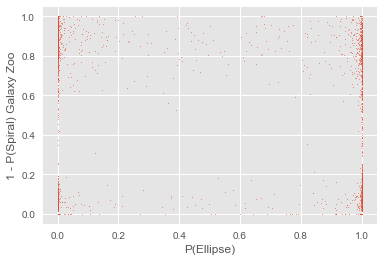

In [845]:
plotprobs(model_probpred=gnb_pred_probs,datatable=elandsp_ordered )

In [841]:
elandsp_ordered.head()

OBJID           RA          DEC  NVOTE   P_EL  P_CW  P_ACW  \
0  587722952231027049  15:52:45.30  -00:33:30.0     37  0.973   0.0  0.000   
1  587722952231027067  15:52:47.11  -00:30:06.3     54  0.889   0.0  0.000   
2  587722952767242437  15:47:00.42  -00:03:22.8     35  0.914   0.0  0.029   
3  587722952767242546  15:47:13.73  -00:08:31.9     66  0.879   0.0  0.000   
4  587722952767439331  15:48:48.53  -00:00:01.6     30  0.867   0.0  0.000   

   P_EDGE   P_DK   P_MG   P_CS  P_EL_DEBIASED  P_CS_DEBIASED  SPIRAL  \
0   0.000  0.027  0.000  0.000          0.973          0.000       0   
1   0.037  0.074  0.000  0.037          0.881          0.045       0   
2   0.029  0.029  0.000  0.057          0.914          0.057       0   
3   0.045  0.076  0.000  0.045          0.879          0.045       0   
4   0.067  0.033  0.033  0.067          0.867          0.067       0   

   ELLIPTICAL  UNCERTAIN  Tm_Rank  
0           1          0        0  
1           1          0        1  
2           1          0        2  
3           1          0        3  
4           1          0        4

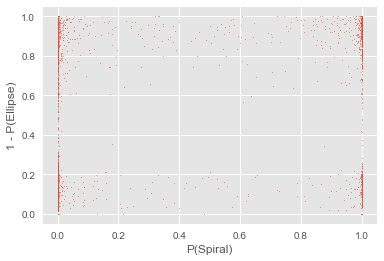

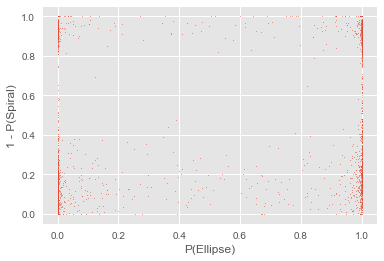

In [843]:
plt.scatter(gnb_pred_probs.T[1],1-np.array(elandsp_ordered.loc[test_index]['P_EL_DEBIASED']), s= 0.1)
plt.xlabel('P(Spiral)')
plt.ylabel('1 - P(Ellipse)')
plt.show()
plt.scatter(gnb_pred_probs.T[0],1-np.array(elandsp_ordered.loc[test_index]['P_CS_DEBIASED']), s= 0.1)
plt.xlabel('P(Ellipse)')
plt.ylabel('1 - P(Spiral)')
plt.show()


In [824]:
gnb_pred_probs.T[0], len(1-elandsp_ordered.loc[test_index]['P_EL'])

(array([[  1.000e+00,   3.817e-10],
        [  9.999e-01,   7.399e-05],
        [  1.000e+00,   2.377e-09],
        ..., 
        [  5.423e-01,   4.577e-01],
        [  1.091e-13,   1.000e+00],
        [  3.029e-05,   1.000e+00]]), 4000)

In [828]:
elandsp_ordered

OBJID           RA          DEC  NVOTE   P_EL   P_CW  \
0      587722952231027049  15:52:45.30  -00:33:30.0     37  0.973  0.000   
1      587722952231027067  15:52:47.11  -00:30:06.3     54  0.889  0.000   
2      587722952767242437  15:47:00.42  -00:03:22.8     35  0.914  0.000   
3      587722952767242546  15:47:13.73  -00:08:31.9     66  0.879  0.000   
4      587722952767439331  15:48:48.53  -00:00:01.6     30  0.867  0.000   
5      587722952767570441  15:49:58.51  -00:04:17.8     60  0.933  0.000   
6      587722952767766870  15:51:46.83  -00:06:18.6     40  0.975  0.000   
7      587722952767898051  15:53:11.12  -00:10:07.6     60  0.817  0.017   
8      587722953303916807  15:44:53.23  +00:24:15.5     33  0.970  0.000   
9      587722953303917016  15:45:23.80  +00:17:39.7     38  0.921  0.026   
10     587722953303917096  15:45:11.66  +00:24:31.8     27  0.963  0.000   
11     587722953304375673  15:49:16.82  +00:19:28.0     40  0.850  0.025   
12     587722953304572015  15:51:11.59  +00:19:10.6     52  0.942  0.000   
13     587722953841639724  15:52:55.43  +00:43:04.9     35  0.857  0.000   
14     587722954109157641  15:44:26.64  +00:42:31.6     29  0.897  0.000   
15     587722981733564662  11:00:39.50  -01:04:58.3     62  0.871  0.000   
16     587722981733630021  11:01:22.01  -01:08:24.9     31  0.935  0.000   
17     587722981735268461  11:15:47.68  -01:06:34.3     39  0.974  0.000   
18     587722981736185996  11:24:42.41  -01:10:44.8     60  0.833  0.033   
19     587722981736644729  11:28:36.17  -01:12:52.9     23  0.957  0.000   
20     587722981736906813  11:30:57.91  -01:08:51.1     36  0.889  0.000   
21     587722981738414167  11:44:34.05  -01:08:20.7     75  0.960  0.000   
22     587722981738414203  11:44:48.39  -01:09:30.7     29  0.897  0.034   
23     587722981738807434  11:48:37.19  -01:12:46.2     68  1.000  0.000   
24     587722981739528262  11:54:49.04  -01:07:54.0     55  0.927  0.000   
25     587722981739593811  11:55:34.42  -01:14:16.8     66  0.864  0.000   
26     587722981739593849  11:55:53.85  -01:10:00.6     27  0.852  0.000   
27     587722981739855982  11:58:09.98  -01:04:34.9     56  0.929  0.018   
28     587722981740118096  12:00:10.41  -01:06:06.1     57  0.930  0.018   
29     587722981740118157  12:00:38.77  -01:09:54.6     25  0.920  0.000   
...                   ...          ...          ...    ...    ...    ...   
19970  587725818574209304  16:08:55.45  +53:37:06.2     27  0.000  0.000   
19971  587725818574209324  16:09:32.88  +53:39:45.0     31  0.677  0.032   
19972  587725818574209351  16:09:32.02  +53:37:12.5     20  0.500  0.000   
19973  587725818574274701  16:09:47.26  +53:35:09.8     30  0.133  0.033   
19974  587725818574274829  16:10:35.03  +53:31:07.8     30  0.500  0.133   
19975  587725818574405847  16:11:06.80  +53:19:24.0     51  0.118  0.020   
19976  587725818574602422  16:12:44.51  +52:54:38.6     24  0.375  0.375   
19977  587725818574667928  16:13:41.49  +52:52:25.8     40  0.050  0.025   
19978  587725818574799066  16:15:16.77  +52:35:24.3     67  0.239  0.164   
19979  587725818574799083  16:15:21.95  +52:33:07.4     28  0.464  0.000   
19980  587725818574995633  16:16:55.51  +52:14:49.3     61  0.246  0.459   
19981  587725818575257839  16:19:23.72  +51:47:02.7     27  0.370  0.000   
19982  587725818575257861  16:19:09.93  +51:42:52.4     27  0.148  0.000   
19983  587725818575323211  16:19:25.29  +51:39:07.3     33  0.091  0.000   
19984  587725818575388801  16:19:53.50  +51:32:47.4     57  0.000  0.000   
19985  587725818575388893  16:20:02.99  +51:29:04.8     24  0.417  0.042   
19986  587725818575388920  16:20:55.88  +51:31:03.5     58  0.569  0.017   
19987  587725818575519968  16:22:03.48  +51:19:36.1     38  0.263  0.000   
19988  587725818835894428  14:40:02.89  +64:03:34.8     55  0.145  0.036   
19989  587725819088404747  09:08:59.72  +59:53:49.2     37  0.027  0.946   
19990  587725819089059997  09:17:35.95  +60:54:45.2     28  0.357  0

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.spectral)
plt.xlabel('$\gamma-values$')
plt.ylabel('C-values')
plt.colorbar()
#plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
#plt.yticks(np.arange(len(C_range)), C_range)
plt.show()

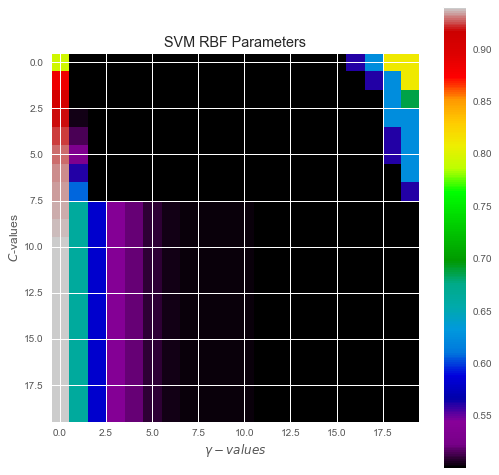

In [58]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.spectral)
plt.xlabel('$\gamma-values$')
plt.ylabel('$C$-values')
plt.title('SVM RBF Parameters')
plt.colorbar()
#plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
#plt.yticks(np.arange(len(C_range)), C_range)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
# clf_svm = SVC(kernel = 'rbf', gamma=.1, C=17.5) 
# clf_svm.fit(X_train, y_train)
# clf_svm.predict(X_test)
# clf_svm.score(X_test, y_ts)
X_tr.shape

(15998, 204)

## Lets try the Random Search Approch to identify the optimal hyperparameters

In [ ]:
## 
print('starting')
import random
rand_best_score = 0 
best_params = {'C':None, 'gamma': None}
for i in range(1):
    print('fitting')
    svc = SVC(gamma = random.random()*10, C = random.random()*10)
    svc.fit(X_tr, y_tr)
    score = svc.score(X_ts, y_ts)
    
    if rand_score > rand_best_score:
        best_score = rand_score
        best_params['C'] = C
        best_params['gamma'] = gamma
print(rand_best_score, best_params)

In [135]:
#X_reduced[0], y_train[0]
b = pca.inverse_transform(X_ts[0])
max(b)

161.08144781442041

In [91]:
df = pd.DataFrame(X_reduced)
df['labels'] = y_train
df.to_csv('PCA_with_label_gal_data.csv', sep=',')

In [491]:
# for train_index, test_index in kf.split(X_reduced):
#     accuracy =[]
#     X_tr, X_ts = X_reduced[train_index], X_reduced[test_index]
#     y_tr, y_ts = y_train[train_index], y_train[test_index]
#     #print 'gamma',i
#     svm_clf = SVC(kernel='rbf', C = 7.5, gamma=0.01)
#     svm_clf.fit(X_tr,y_tr)
#     #print clf.score(X_ts, y_ts)
#     print(accuracy_score(y_ts,clf.predict(X_ts)))
#     #accuracy.append(accuracy_score(y_ts,clf.predict(X_ts)))
# print(accuracy)
        

In [ ]:
X_reduced.shape
from sklearn.utils import shuffle
C = np.linspace(0.001,.2,10)

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_reduced):
    accuracy =[]
    X_tr, X_ts = X_reduced[train_index], X_reduced[test_index]
    y_tr, y_ts = y_train[train_index], y_train[test_index]
    for i in C:
        #print 'gamma',i
        clf = SVC(kernel='rbf', C = i)
        clf.fit(X_tr,y_tr)
        print clf.score(X_ts, y_ts)
        accuracy.append(accuracy_score(y_ts,clf.predict(X_ts)))
    plt.plot(C, accuracy)

In [ ]:
X_reduced.shape
from sklearn.utils import shuffle
C = np.linspace(1,5,10)

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_reduced):
    accuracy =[]
    X_tr, X_ts = X_reduced[train_index], X_reduced[test_index]
    y_tr, y_ts = y_train[train_index], y_train[test_index]
    for i in C:
        #print 'gamma',i
        clf = SVC(kernel='rbf', C = i)
        clf.fit(X_tr,y_tr)
        print clf.score(X_ts, y_ts)
        accuracy.append(accuracy_score(y_ts,clf.predict(X_ts)))
    plt.plot(C, accuracy)

In [ ]:
X_ts.shape, X_tr.shape

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = []
for i in gamma:
    

In [43]:
############################################################
################ Confusion Matrix ##########################
############################################################

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)-3)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



# PCA Applied to SVM

FITTING: 
SCORING!: 
0.934
FITTING: 
SCORING!: 
0.94425
FITTING: 
SCORING!: 
0.9385
FITTING: 
SCORING!: 
0.94175
FITTING: 
SCORING!: 
0.94125
1
19940
2
19935
3
19853
4
19759
5
19646
CPU times: user 29min 43s, sys: 27.3 s, total: 30min 10s
Wall time: 31min 22s


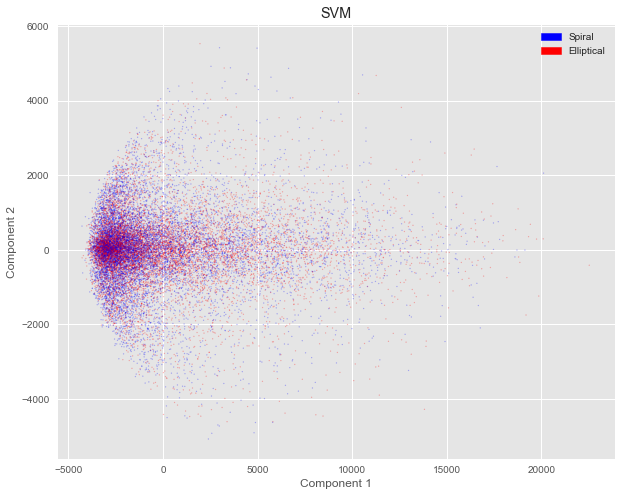

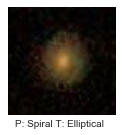

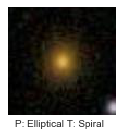

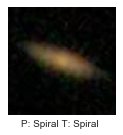

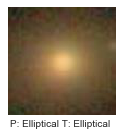

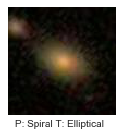

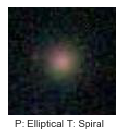

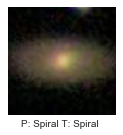

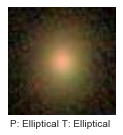

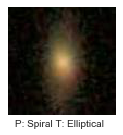

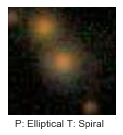

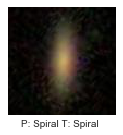

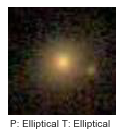

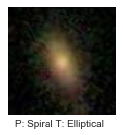

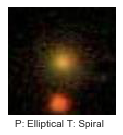

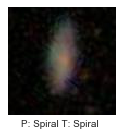

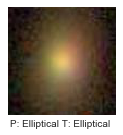

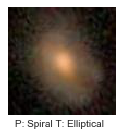

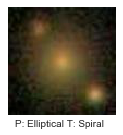

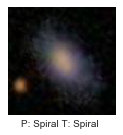

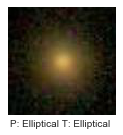

In [847]:
%%time
from sklearn.naive_bayes import GaussianNB
gaussnb = GaussianNB()
kfs = KFold(n_splits=5, shuffle=True, random_state=343)
svm = SVC(kernel='rbf', C =2.5 , gamma=0.01, probability=True)
for train_index, test_index in kfs.split(Xredred):
    accuracy =[]
    X_tr, X_ts = Xredred[train_index], Xredred[test_index]
    y_tr, y_ts = np.array(y_train)[train_index], np.array(y_train)[test_index]
    print('FITTING: ')
    svm.fit(X_tr,y_tr)
    print('SCORING!: ')
    print svm.score(X_ts, y_ts)
    svm_pred = svm.predict(X_ts)
    svm_predproba = svm.predict_proba(X_ts)
    accuracy.append(accuracy_score(y_ts,svm.predict(X_ts)))
color_trains_gen = []                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      color_label_gen = []
for label in np.round(svm_pred):
    if label == 1: ## Spiral
        color_trains_gen.append('blue')
        color_label_gen.append('Spiral')
        
    else: ## Ellipse 
        color_trains_gen.append('red')
        color_label_gen.append('Elliptical')
import matplotlib.patches as mpatches
plt.figure(figsize=(10,8))
red_patch = mpatches.Patch(color = 'blue', label = 'Spiral')
blue_patch = mpatches.Patch(color = 'red', label = 'Elliptical')
plt.scatter(pca2.T[0], pca2.T[1], c = color_trains_gen, s = .8, alpha= 0.2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('SVM')
plt.grid('on')
plt.legend(handles = [red_patch, blue_patch])

image_summoner(truth=y_ts, predictions=np.round(svm_pred))

# Gaussian Naive Bayes

FITTING: 
SCORING!: 
0.7455
FITTING: 
SCORING!: 
0.73675
FITTING: 
SCORING!: 
0.7355
FITTING: 
SCORING!: 
0.74875
FITTING: 
SCORING!: 
0.74475
1
19972
2
19953
3
19940
4
19913
5
19912


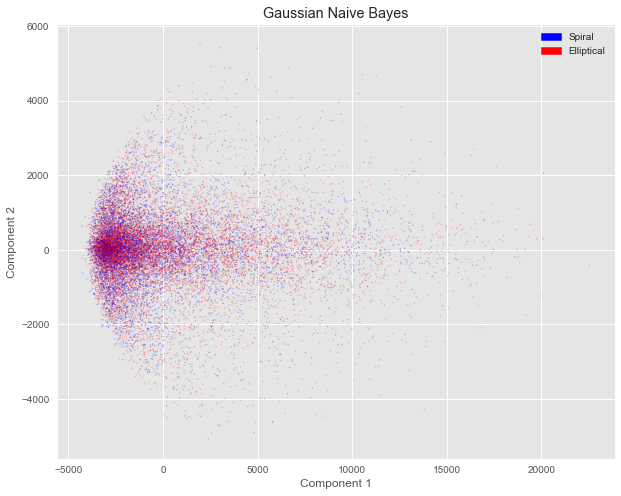

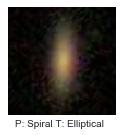

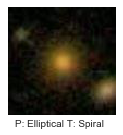

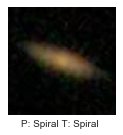

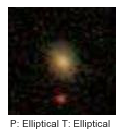

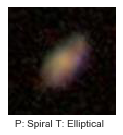

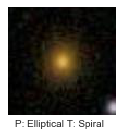

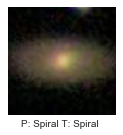

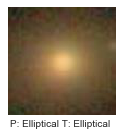

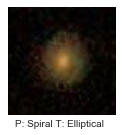

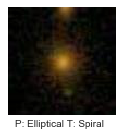

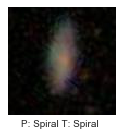

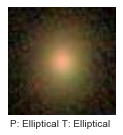

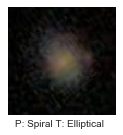

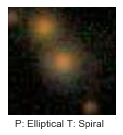

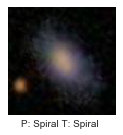

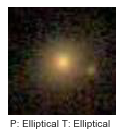

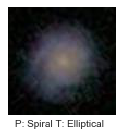

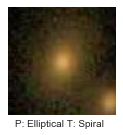

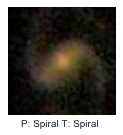

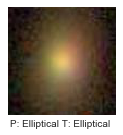

In [852]:
from sklearn.naive_bayes import GaussianNB
gaussnb = GaussianNB()
kfs = KFold(n_splits=5, shuffle=True, random_state=343)
for train_index, test_index in kfs.split(Xredred):
    accuracy =[]
    X_tr, X_ts = Xredred[train_index], Xredred[test_index]
    y_tr, y_ts = np.array(y_train)[train_index], np.array(y_train)[test_index]
    print('FITTING: ')
    gaussnb.fit(X_tr,y_tr)
    print('SCORING!: ')
    print gaussnb.score(X_ts, y_ts)
    gnb_pred = gaussnb.predict(X_ts)
    accuracy.append(accuracy_score(y_ts,gaussnb.predict(X_ts)))
    gnb_pred_probs = gaussnb.predict_proba(X_ts)
color_trains_gen = []
color_label_gen = []
for label in np.round(gnb_pred):
    if label == 1: ## Spiral
        color_trains_gen.append('blue')
        color_label_gen.append('Spiral')
        
    else: ## Ellipse 
        color_trains_gen.append('red')
        color_label_gen.append('Elliptical')
import matplotlib.patches as mpatches
plt.figure(figsize=(10,8))
red_patch = mpatches.Patch(color = 'blue', label = 'Spiral')
blue_patch = mpatches.Patch(color = 'red', label = 'Elliptical')
plt.scatter(pca2.T[0], pca2.T[1], c = color_trains_gen, s = .8, alpha= 0.2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Gaussian Naive Bayes')
plt.grid('on')
plt.legend(handles = [red_patch, blue_patch])

image_summoner(truth=y_ts, predictions=np.round(gnb_pred))

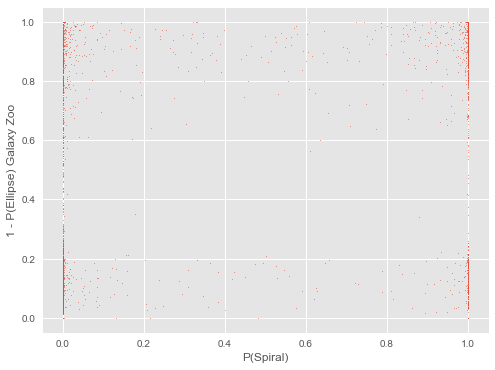

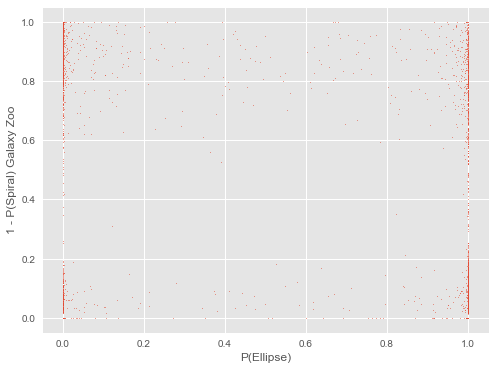

In [853]:
plotprobs(model_probpred=gnb_pred_probs,datatable=elandsp_ordered )

 Now calculating metrics.......
('Accuracy: ', 0.80600000000000005)
('Accuracy: ', 0.77124999999999999)
('Accuracy: ', 0.8145)
('Accuracy: ', 0.77975000000000005)
('Accuracy: ', 0.8095)
('Accuracy: ', 0.78449999999999998)
('Accuracy: ', 0.80374999999999996)
('Accuracy: ', 0.77949999999999997)
('Accuracy: ', 0.79825000000000002)


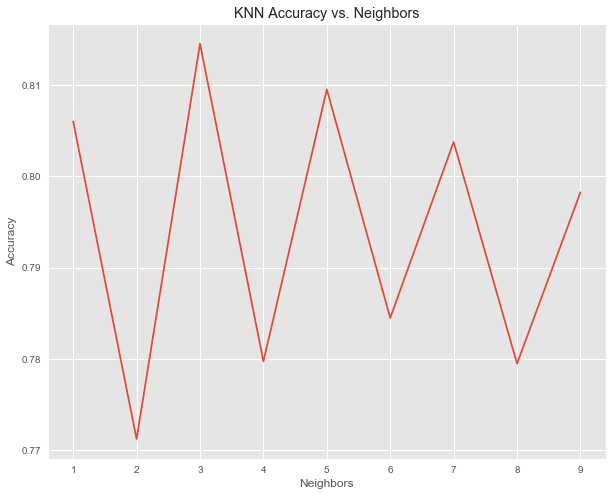

In [676]:
#########################################################################
##################### K-Nearest Neighbors ###############################
# from sklearn.neighbors import KNeighborsClassifier
# print('Start')
# neigh = KNeighborsClassifier()

print (' Now calculating metrics.......')
neighbors = np.arange(1, 10)
accuracy = []
for nbr in neighbors:
    neigh = KNeighborsClassifier(n_neighbors = nbr)
    #print('Starting fit')

    neigh.fit(X_tr, y_tr )
    #print('Fit Done')
    y_pred = neigh.predict(X_ts)

    print('Accuracy: ',accuracy_score(y_ts, y_pred))
    accuracy.append(accuracy_score(y_ts, y_pred))
plt.figure(figsize=(10,8))
plt.plot(neighbors, accuracy)#, label = n_components[n_component] )
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Neighbors')
plt.grid('on')
plt.legend()
plt.show()
    

### PLOT IMAGES Function


In [77]:
def arraytopic(data_array,  predicted_l = None, true_l = None):
    plt.figure(figsize = (2,2)).text(.5, .05,'P: ' +predicted_l + ' T: ' + true_l , ha = 'center')
    fig = plt.imshow(np.uint8(pca.inverse_transform(data_array).reshape(100,100,3)))
    plt.axes().get_yaxis().set_visible(False)
    plt.axes().get_xaxis().set_visible(False)
    return fig
def regarraytopic(data_array, predicted_l = None, true_l = None):
    plt.figure(figsize = (2,2)).text(.5, .05,'P: ' +predicted_l + ' T: ' + true_l , ha = 'center')
    fig = plt.imshow(np.uint8(data_array.reshape(100,100,3)))
    plt.axes().get_yaxis().set_visible(False)
    plt.axes().get_xaxis().set_visible(False)
    return fig
def array2topic(data_array, label):#  predicted_l = None, true_l = None):
    plt.figure(figsize = (2,2)).text(.5, .05,label + ' ' +  str(data_array), ha = 'center')
    fig = plt.imshow(np.uint8(pca_2d.inverse_transform(data_array).reshape(100,100,3)))
    plt.axes().get_yaxis().set_visible(False)
    plt.axes().get_xaxis().set_visible(False)
    return fig

In [490]:
# import matplotlib.pyplot as plt
# import numpy.random as rnd
# fig = plt.figure()
# plt.subplot(221)
# arraytopic(X_tr[0], 'Spiral','Spiral')
# plt.subplot(222)
# arraytopic(X_tr[0], 'Spiral','Spiral')
# plt.subplot(223)
# arraytopic(X_tr[0], 'Spiral','Spiral')
# plt.subplot(224)
# plt.imshow(rnd.random((100, 100)))


# SVM images

In [317]:
svm_clf = SVC(kernel='rbf', C = 17.5, gamma=0.01)
svm_clf.fit(X_tr,y_tr)
accuracy_score(y_ts, svm_clf.predict(X_ts))

0.91147786946736686

In [325]:
e = np.array(y_ts == svm_clf.predict(X_ts))

In [330]:
svm_preds = svm_clf.predict(X_ts)
svm_preds[27], y_ts[27]

(1, 0)

In [394]:
svm_preds[71], y_ts[71]
#np.where(e == False)

(1, 1)

In [287]:
def arraytopic(data_array):
    return Image.fromarray(np.uint8(pca.inverse_transform(data_array).reshape(100,100,3)))
type(arraytopic(X_ts[4]))

PIL.Image.Image

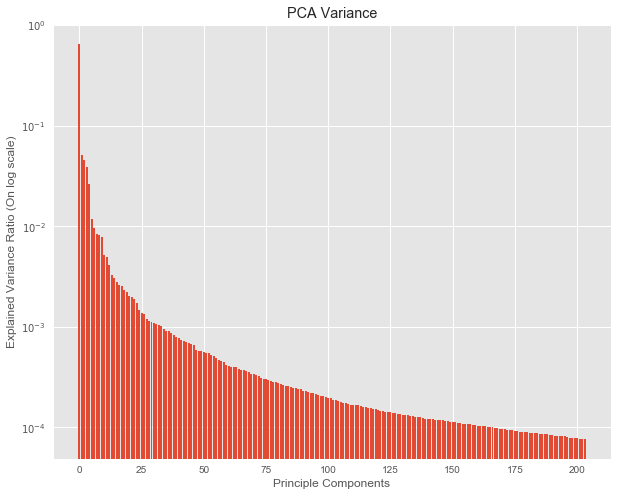

In [114]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.xlabel('Principle Components')
plt.ylabel('Explained Variance Ratio (On log scale)')
plt.title('PCA Variance')
plt.yscale('log')


In [109]:
sum(pca.explained_variance_ratio_)

0.95821461568446376

In [ ]:
Xredred =

In [899]:
(svm_tpr/(340.08658658658658)).sum()

1.0

In [736]:
a = y_ts

In [896]:
mlpnn.hidden_layer_sizes

(100,)

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_true, y_pred)

def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel('True Positive Rate')

# Random Forests

0.9265
0.93275
0.92675
0.92625
0.9285
1
19940
2
19935
3
19646
4
19642
5
19627
CPU times: user 15.4 s, sys: 1.38 s, total: 16.8 s
Wall time: 19.7 s


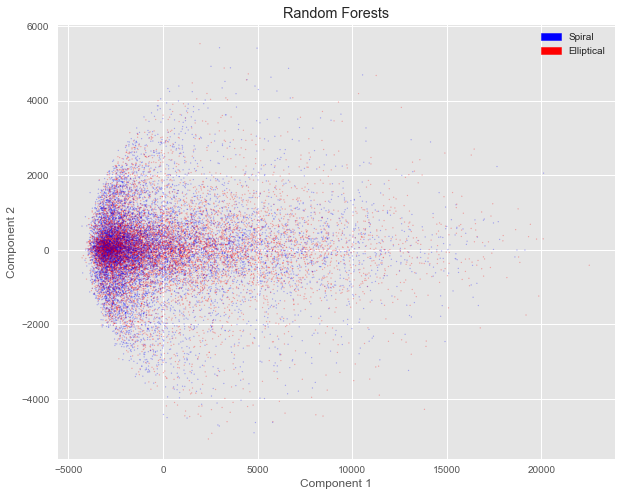

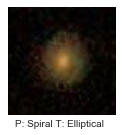

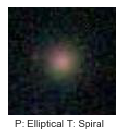

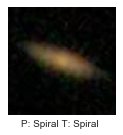

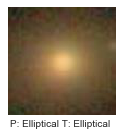

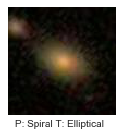

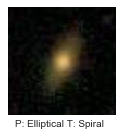

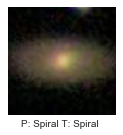

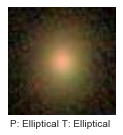

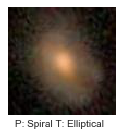

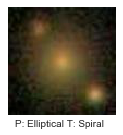

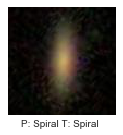

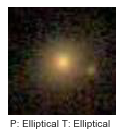

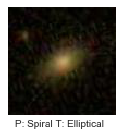

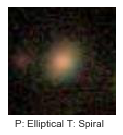

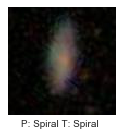

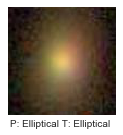

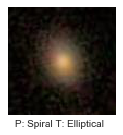

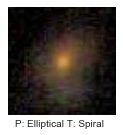

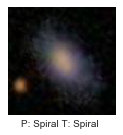

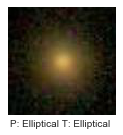

In [892]:
%%time
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion='gini')

from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle=True, random_state=343)
for train_index, test_index in kf.split(Xredred):
    X_tr, y_tr = Xredred[train_index], np.array(y_train)[train_index]
    X_ts, y_ts = Xredred[test_index], np.array(y_train)[test_index]
    RF.fit(X_tr,y_tr)
    rf_pred = RF.predict(X_ts)
    rf_pred_proba = RF.predict_proba(X_ts)
    print(accuracy_score(y_ts, rf_pred))
color_trains_gen = []
color_label_gen = []
for label in np.round(rf_pred):
    if label == 1: ## Spiral
        color_trains_gen.append('blue')
        color_label_gen.append('Spiral')
        
    else: ## Ellipse 
        color_trains_gen.append('red')
        color_label_gen.append('Elliptical')
import matplotlib.patches as mpatches
plt.figure(figsize=(10,8))
red_patch = mpatches.Patch(color = 'blue', label = 'Spiral')
blue_patch = mpatches.Patch(color = 'red', label = 'Elliptical')
plt.scatter(pca2.T[0], pca2.T[1], c = color_trains_gen, s = .8, alpha= 0.2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Random Forests')
plt.grid('on')
plt.legend(handles = [red_patch, blue_patch])
image_summoner(truth=y_ts, predictions=np.round(rf_pred))

0.93475
0.92975
0.93825
0.9255
0.92775
1
19940
2
19750
3
19724
4
19646
5
19642
CPU times: user 17.4 s, sys: 395 ms, total: 17.8 s
Wall time: 19.1 s


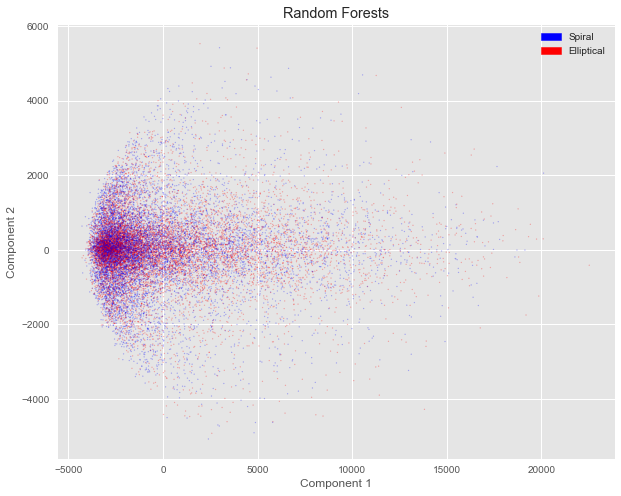

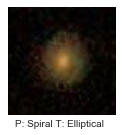

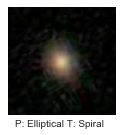

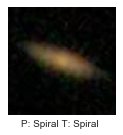

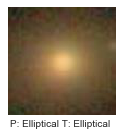

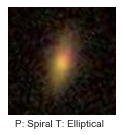

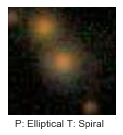

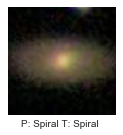

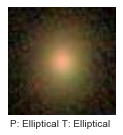

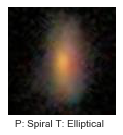

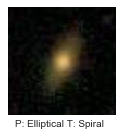

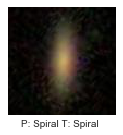

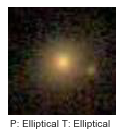

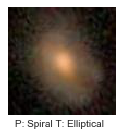

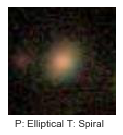

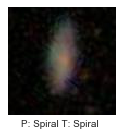

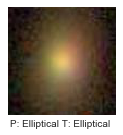

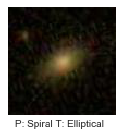

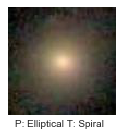

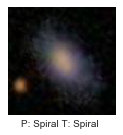

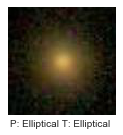

In [893]:
%%time
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion='entropy')

from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle=True, random_state=343)
for train_index, test_index in kf.split(Xredred):
    X_tr, y_tr = Xredred[train_index], np.array(y_train)[train_index]
    X_ts, y_ts = Xredred[test_index], np.array(y_train)[test_index]
    RF.fit(X_tr,y_tr)
    rf_pred = RF.predict(X_ts)
    rf_pred_proba = RF.predict_proba(X_ts)
    print(accuracy_score(y_ts, rf_pred))
color_trains_gen = []
color_label_gen = []
for label in np.round(rf_pred):
    if label == 1: ## Spiral
        color_trains_gen.append('blue')
        color_label_gen.append('Spiral')
        
    else: ## Ellipse 
        color_trains_gen.append('red')
        color_label_gen.append('Elliptical')
import matplotlib.patches as mpatches
plt.figure(figsize=(10,8))
red_patch = mpatches.Patch(color = 'blue', label = 'Spiral')
blue_patch = mpatches.Patch(color = 'red', label = 'Elliptical')
plt.scatter(pca2.T[0], pca2.T[1], c = color_trains_gen, s = .8, alpha= 0.2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Random Forests')
plt.grid('on')
plt.legend(handles = [red_patch, blue_patch])
image_summoner(truth=y_ts, predictions=np.round(rf_pred))

# K-Nearest Neighbors

0.81825
0.79975
0.79625
0.8105
0.8145
1
19974
2
19965
3
19963
4
19941
5
19940
CPU times: user 5min 12s, sys: 5.32 s, total: 5min 18s
Wall time: 5min 38s


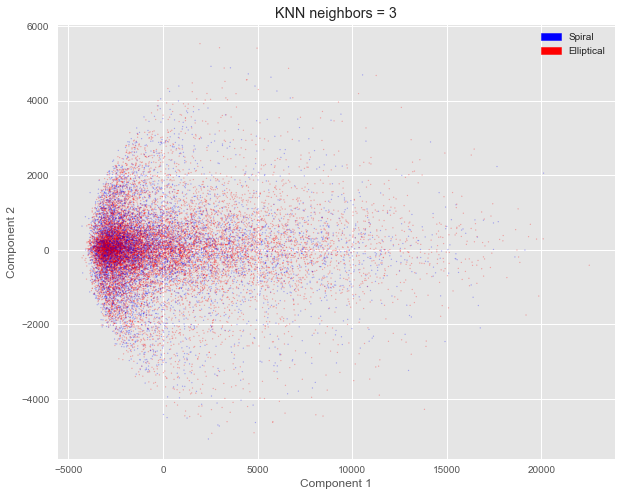

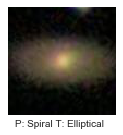

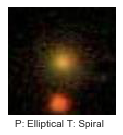

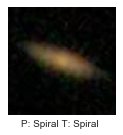

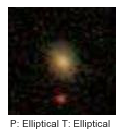

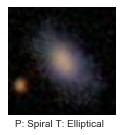

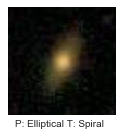

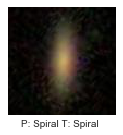

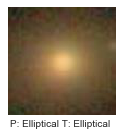

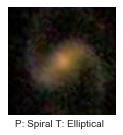

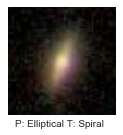

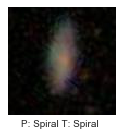

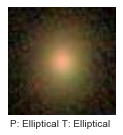

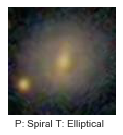

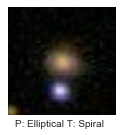

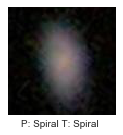

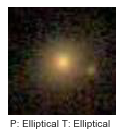

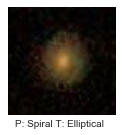

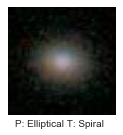

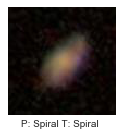

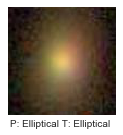

In [856]:
%%time
## K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits = 5, shuffle=True, random_state=343)
for train_index, test_index in kf.split(Xredred):
    X_tr, y_tr = Xredred[train_index], np.array(y_train)[train_index]
    X_ts, y_ts = Xredred[test_index], np.array(y_train)[test_index]
    knn.fit(X_tr,y_tr)
    knn_pred = knn.predict(X_ts)
    knn_pred_proba = knn.predict_proba(X_ts)
    print(accuracy_score(y_ts, knn_pred))
    
color_trains_gen = []
color_label_gen = []
for label in np.round(knn_pred):
    if label == 1: ## Spiral
        color_trains_gen.append('blue')
        color_label_gen.append('Spiral')
        
    else: ## Ellipse 
        color_trains_gen.append('red')
        color_label_gen.append('Elliptical')
import matplotlib.patches as mpatches
plt.figure(figsize=(10,8))
red_patch = mpatches.Patch(color = 'blue', label = 'Spiral')
blue_patch = mpatches.Patch(color = 'red', label = 'Elliptical')
plt.scatter(pca2.T[0], pca2.T[1], c = color_trains_gen, s = .8, alpha= 0.2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('KNN neighbors = 3')
plt.grid('on')
plt.legend(handles = [red_patch, blue_patch])
image_summoner(truth=y_ts, predictions=np.round(knn_pred))

# Logistic Regression

0.89775
0.89325
0.901
0.89275
0.88325
1
19974
2
19940
3
19935
4
19924
5
19853


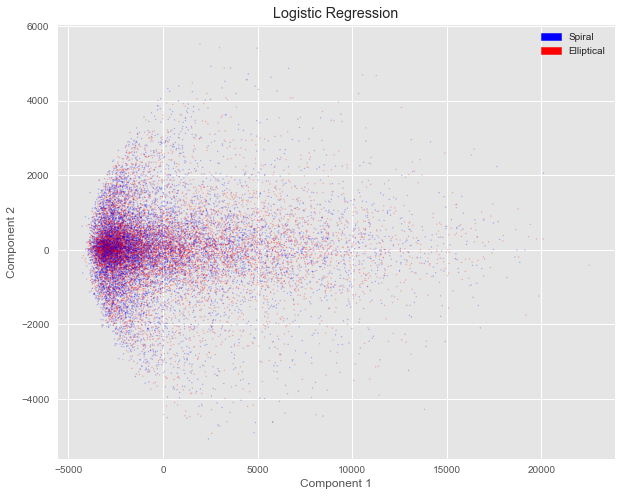

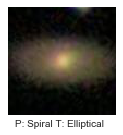

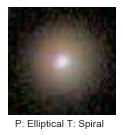

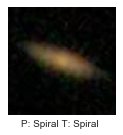

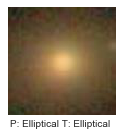

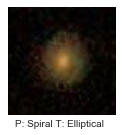

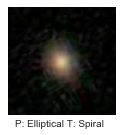

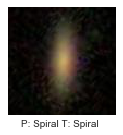

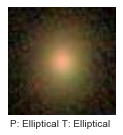

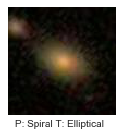

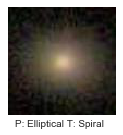

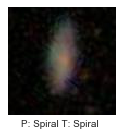

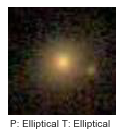

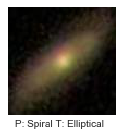

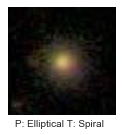

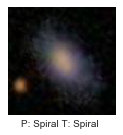

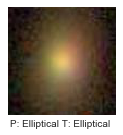

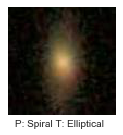

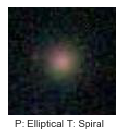

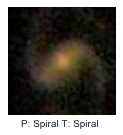

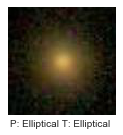

In [859]:
## Logistic Regression
logreg = LogisticRegression()
kf = KFold(n_splits = 5, shuffle=True, random_state=343)
for train_index, test_index in kf.split(Xredred):
    X_tr, y_tr = Xredred[train_index], np.array(y_train)[train_index]
    X_ts, y_ts = Xredred[test_index], np.array(y_train)[test_index]
    logreg.fit(X_tr,y_tr)
    logreg_pred = logreg.predict(X_ts)
    logreg_pred_proba = logreg.predict_proba(X_ts)
    print(accuracy_score(y_ts, logreg_pred))

color_trains_gen = []
color_label_gen = []
for label in np.round(logreg_pred):
    if label == 1: ## Spiral
        color_trains_gen.append('blue')
        color_label_gen.append('Spiral')
        
    else: ## Ellipse 
        color_trains_gen.append('red')
        color_label_gen.append('Elliptical')
import matplotlib.patches as mpatches
plt.figure(figsize=(10,8))
red_patch = mpatches.Patch(color = 'blue', label = 'Spiral')
blue_patch = mpatches.Patch(color = 'red', label = 'Elliptical')
plt.scatter(pca2.T[0], pca2.T[1], c = color_trains_gen, s = .8, alpha= 0.2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Logistic Regression')
plt.grid('on')
plt.legend(handles = [red_patch, blue_patch])
# plt.show()
image_summoner(predictions=np.round(logreg_pred), truth=y_ts)

# VOTING CLASSIFIER (SOFT)

0.94875
0.95725
0.9535
0.9515
0.94525
1
19974
2
19940
3
19935
4
19853
5
19759
CPU times: user 35min 57s, sys: 40.1 s, total: 36min 37s
Wall time: 38min 38s


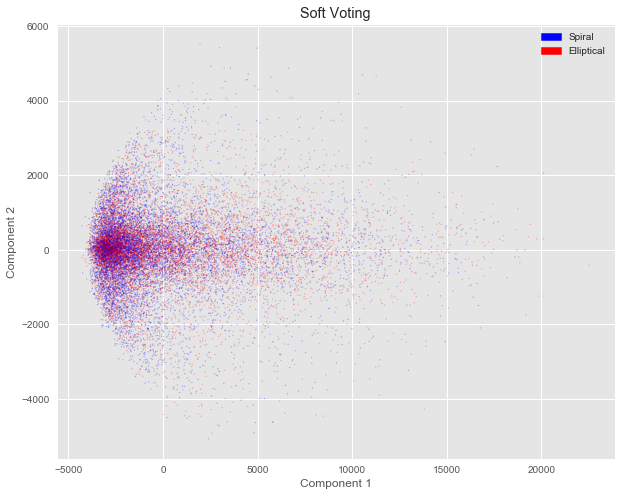

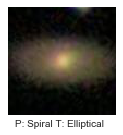

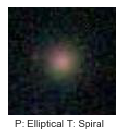

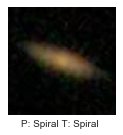

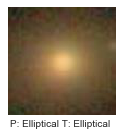

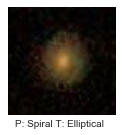

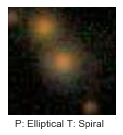

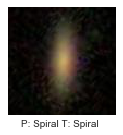

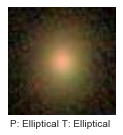

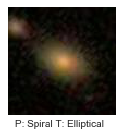

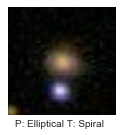

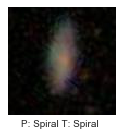

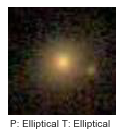

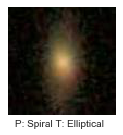

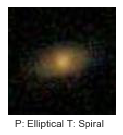

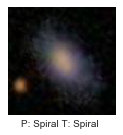

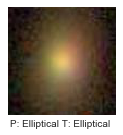

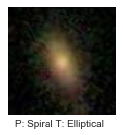

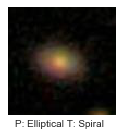

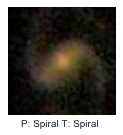

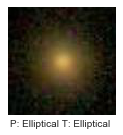

In [865]:
%%time
### VOTING CLASSIFIER (SOFT)
kf = KFold(n_splits = 5, shuffle=True, random_state=343)
ensemble_soft = VotingClassifier(estimators=[
        ('svm', svm), ('rf', RF), ('logreg', logreg), ('bayes', bayes_clf),
        ('knn', knn), ('MLP', mlpnn)
    ], voting='soft')
for train_index, test_index in kf.split(Xredred):
    X_tr, y_tr = Xredred[train_index], np.array(y_train)[train_index]
    X_ts, y_ts = Xredred[test_index], np.array(y_train)[test_index]
    ensemble_soft.fit(X_tr,y_tr)
    soft_pred = ensemble_soft.predict(X_ts)
    soft_pred_proba = ensemble_soft.predict_proba(X_ts)
    print(accuracy_score(y_ts, soft_pred))

color_trains_gen = []
color_label_gen = []
for label in np.round(soft_pred):
    if label == 1: ## Spiral
        color_trains_gen.append('blue')
        color_label_gen.append('Spiral')
        
    else: ## Ellipse 
        color_trains_gen.append('red')
        color_label_gen.append('Elliptical')
import matplotlib.patches as mpatches
plt.figure(figsize=(10,8))
red_patch = mpatches.Patch(color = 'blue', label = 'Spiral')
blue_patch = mpatches.Patch(color = 'red', label = 'Elliptical')
plt.scatter(pca2.T[0], pca2.T[1], c = color_trains_gen, s = .8, alpha= 0.2)
plt.title('Soft Voting')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid('on')
plt.legend(handles = [red_patch, blue_patch])
# plt.show()
image_summoner(truth=y_ts, predictions=np.round(soft_pred))

In [ ]:
plotprobs(model_probpred=svm_pred_proba,datatable=elandsp_ordered )

In [874]:
a[(a.SPIRAL==1)].shape

(190225, 16)

# Voting Hard

0.944
0.943
0.94575
0.94775
0.94025
1
19940
2
19935
3
19853
4
19759
5
19694


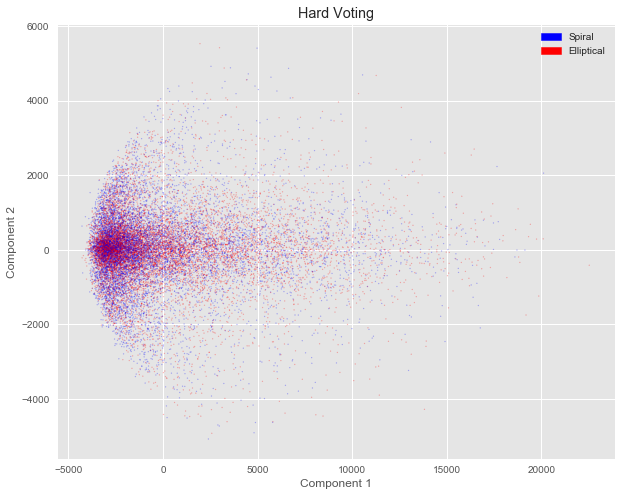

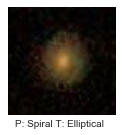

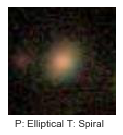

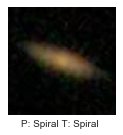

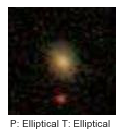

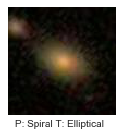

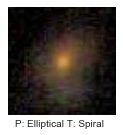

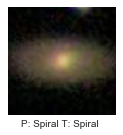

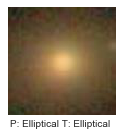

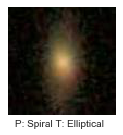

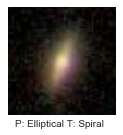

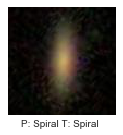

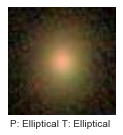

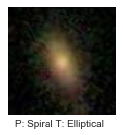

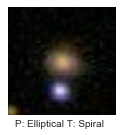

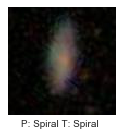

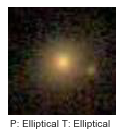

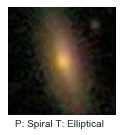

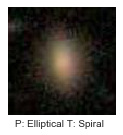

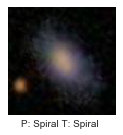

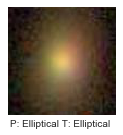

In [875]:
## Voting Hard
kf = KFold(n_splits = 5, shuffle=True, random_state=343)
ensemble_hard = VotingClassifier(estimators=[
        ('svm', svm), ('rf', RF), ('logreg', logreg_clf), ('bayes', bayes_clf),
        ('knn', knn), ('MLP', mlpnn)
    ], voting='hard')
for train_index, test_index in kf.split(Xredred):
    X_tr, y_tr = Xredred[train_index], np.array(y_train)[train_index]
    X_ts, y_ts = Xredred[test_index], np.array(y_train)[test_index]
    ensemble_hard.fit(X_tr,y_tr)
    hard_pred = ensemble_hard.predict(X_ts)
    # hard_predproba = ensemble_hard.predict_proba(X_ts)
    print(accuracy_score(y_ts, hard_pred))
    
color_trains_gen = []
color_label_gen = []
for label in np.round(hard_pred):
    if label == 1: ## Spiral
        color_trains_gen.append('blue')
        color_label_gen.append('Spiral')
        
    else: ## Ellipse 
        color_trains_gen.append('red')
        color_label_gen.append('Elliptical')
import matplotlib.patches as mpatches
plt.figure(figsize=(10,8))
red_patch = mpatches.Patch(color = 'blue', label = 'Spiral')
blue_patch = mpatches.Patch(color = 'red', label = 'Elliptical')
plt.scatter(pca2.T[0], pca2.T[1], c = color_trains_gen, s = .8, alpha= 0.2)
plt.title('Hard Voting')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid('on')
plt.legend(handles = [red_patch, blue_patch])
# plt.show()   
    
    
image_summoner(truth=y_ts, predictions=np.round(hard_pred))

In [881]:
acc_models = {'MLP':  [0.952,0.95775,0.9555,0.95625,0.95025],
'Gaussian Naive Bayes' : [0.7455,0.73675,0.7355, 0.74875, 0.74475],
'Logistic Regression' : [0.89775,0.89325,0.901,0.89275,0.88325],
'Random Forest' : [0.9345,0.93625,0.9355,0.9355,0.926],
'KNN': [0.81825, 0.79975, 0.79625, 0.8105, 0.8145], 
'SVM (rbf)': [0.945, 0.93475,0.938,0.93675,0.93925],
'Hard Voting' : [0.944,0.943, 0.94575, 0.94775, 0.94025],
'Soft Voting' :  [0.94875,0.95725,0.9535,0.9515,0.94525] }
kfolds = np.arange(1,6)

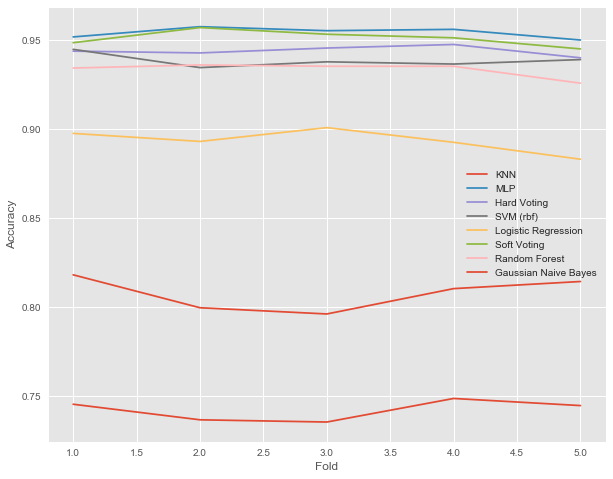

In [891]:
plt.figure(figsize=(10,8))
for i in acc_models.keys():
    
    plt.plot(kfolds, acc_models[i], label=i)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(loc= 'right')

# MLP Neural Network

0.952
0.95775
0.9555
0.95625
0.95025
1
19935
2
19646
3
19642
4
19627
5
19561
CPU times: user 58.3 s, sys: 5.16 s, total: 1min 3s
Wall time: 54.6 s


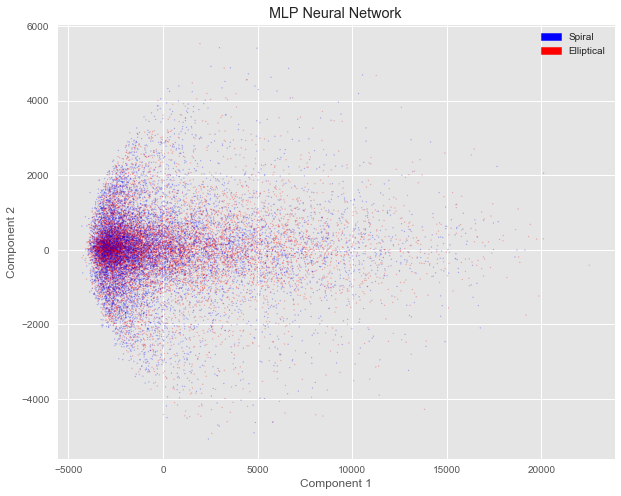

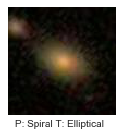

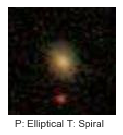

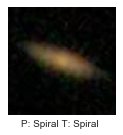

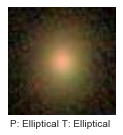

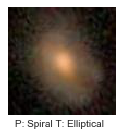

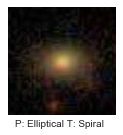

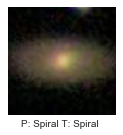

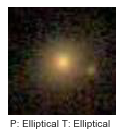

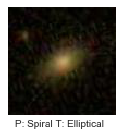

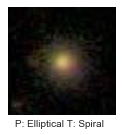

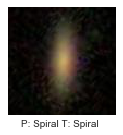

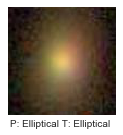

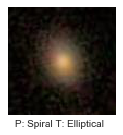

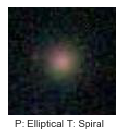

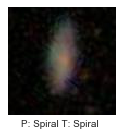

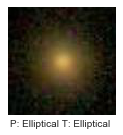

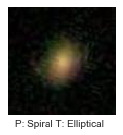

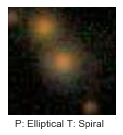

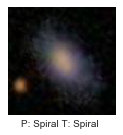

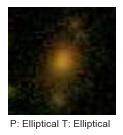

In [862]:
%%time
from sklearn.neural_network import MLPClassifier
mlpnn = MLPClassifier()

kf = KFold(n_splits = 5, shuffle=True, random_state=343)
for train_index, test_index in kf.split(Xredred):
    X_tr, y_tr = Xredred[train_index], np.array(y_train)[train_index]
    X_ts, y_ts = Xredred[test_index], np.array(y_train)[test_index]
    mlpnn.fit(X_tr,y_tr)
    mlp_pred = mlpnn.predict(X_ts)
    mlp_pred_proba = mlpnn.predict_proba(X_ts)
    print(accuracy_score(y_ts, mlp_pred))
color_trains_gen = []
color_label_gen = []


for label in np.round(mlp_pred):
    if label == 1: ## Spiral
        color_trains_gen.append('blue')
        color_label_gen.append('Spiral')
        
    else: ## Ellipse 
        color_trains_gen.append('red')
        color_label_gen.append('Elliptical')
import matplotlib.patches as mpatches
plt.figure(figsize=(10,8))
red_patch = mpatches.Patch(color = 'blue', label = 'Spiral')
blue_patch = mpatches.Patch(color = 'red', label = 'Elliptical')
plt.scatter(pca2.T[0], pca2.T[1], c = color_trains_gen, s = .8, alpha= 0.2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('MLP Neural Network')
plt.grid('on')
plt.legend(handles = [red_patch, blue_patch])
# plt.show()
image_summoner(truth = np.round(mlp_pred), predictions = y_ts)

In [690]:
# test_index[np.where(y_ts == pred)[0]][-20:-10], len(test_index[np.where(y_ts == pred)[0]])
# pd.Series(np.round(pred)).value_counts(), pd.Series(y_ts).value_counts()

In [733]:
def image_summoner(predictions, truth):
    right_preds = test_index[np.where(truth == predictions)[0]]
    wrong_preds = test_index[np.where(truth != predictions)[0]]
    for i in range(1,6):
        print(i)
        # Wrong Spiral
        print(wrong_preds[i*(-1)])
        regarraytopic(X_train[wrong_preds[i*(-1)]], predicted_l='Spiral', true_l='Elliptical')
        
        # Wrong Elliptical
        regarraytopic(X_train[wrong_preds[i]],predicted_l='Elliptical', true_l='Spiral' )
        
        # Right Spiral
        regarraytopic(X_train[right_preds[i*(-1)]], predicted_l='Spiral', true_l='Spiral')
        # Right Elliptical
        regarraytopic(X_train[right_preds[i]],predicted_l='Elliptical', true_l='Elliptical')

    

In [592]:
# import pandas as pd
# A = pd.read_csv('PCA_with_label_gal_data.csv')
# X, y = A[list(set(A.columns)-set(['labels','Unnamed: 0']))], A['labels']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2)

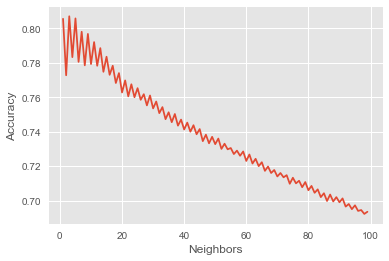

In [40]:
from sklearn.neighbors import KNeighborsClassifier
nbrs = range(1,100)
acc = []
for i in nbrs:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, knn.predict(X_test)))
plt.plot(nbrs, acc)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')


In [ ]:
knn = KNeighborsClassifier(n_neighbors=i)
knn.fit(X_train, y_train)

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(accuracy_score(y_test,logreg.predict(X_test)))

0.8915


Normalized confusion matrix
[[ 0.91  0.09]
 [ 0.13  0.87]]


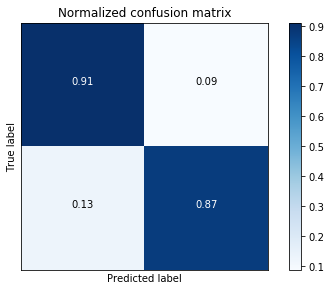

In [66]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
class_names = ['Spiral', 'Elliptical']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)-2)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, logreg.predict(X_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
# plot_confusion_matrix(cnf_matrix, # classes=class_names,
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()





In [726]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)-2)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[ 0.976  0.024]
 [ 0.345  0.655]]


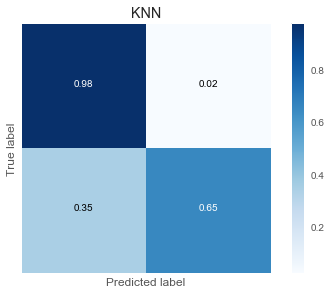

Normalized confusion matrix
[[ 0.967  0.033]
 [ 0.079  0.921]]


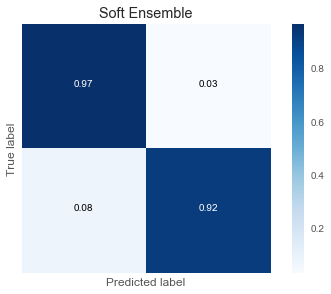

Normalized confusion matrix
[[ 0.958  0.042]
 [ 0.047  0.953]]


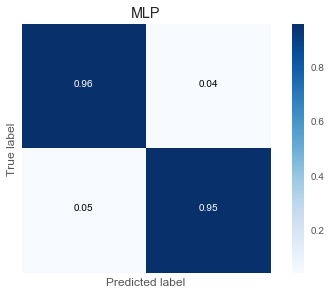

Normalized confusion matrix
[[ 0.935  0.065]
 [ 0.053  0.947]]


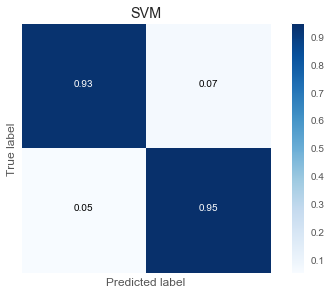

Normalized confusion matrix
[[ 0.98   0.02 ]
 [ 0.095  0.905]]


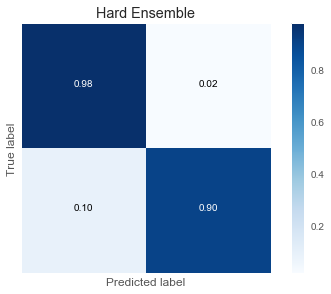

Normalized confusion matrix
[[ 0.903  0.097]
 [ 0.136  0.864]]


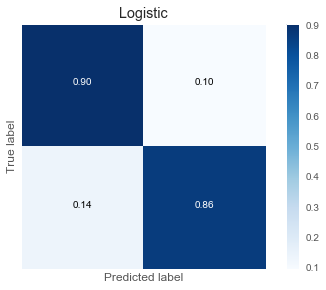

Normalized confusion matrix
[[ 0.946  0.054]
 [ 0.087  0.913]]


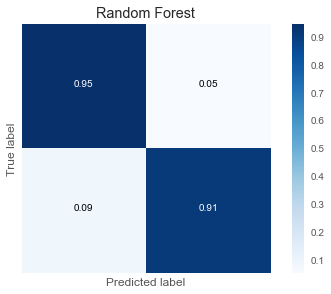

Normalized confusion matrix
[[ 0.839  0.161]
 [ 0.349  0.651]]


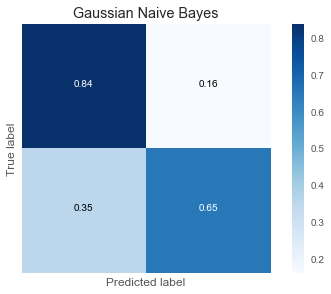

In [727]:
model_map = {'Logistic':np.round(logreg_pred), 
             'Gaussian Naive Bayes': np.round(gnb_pred),
              'KNN': np.round(knn_pred),
             'MLP': np.round(mlpnn_pred),
              'Random Forest': np.round(rf_pred),
             'SVM': np.round(svm_pred),
               'Soft Ensemble': np.round(soft_pred),
             'Hard Ensemble': np.round(hard_pred) 
            }
# cnf_matrix = confusion_matrix(y_ts, logreg_pred)
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                       title='Logistic Regression')
for i in model_map.keys():
    cnf_matrix = confusion_matrix(y_ts, model_map[i])
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title=i)
    plt.show()
    

In [451]:
from sklearn.metrics import roc_curve
from ggplot import * 
from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)
# knn.score(X_test,y_test)
# preds = knn.predict_proba(X_test)

CPU times: user 133 ms, sys: 5.88 ms, total: 139 ms
Wall time: 144 ms


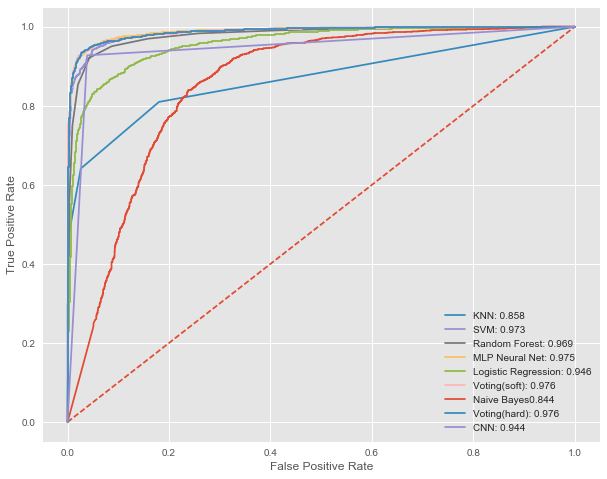

In [404]:
%%time
print('WITH MLP')
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_tr, y_tr)
knn_pred = knn.predict_proba(X_ts)[:,1]
knn_fpr, knn_tpr, _ = roc_curve(y_ts, knn_pred)
frame_knn = pd.DataFrame(dict(fpr=knn_fpr, tpr=knn_tpr))


svm_clf = SVC(kernel='rbf', C = 2.5, gamma=0.01, probability=True)
svm_clf.fit(X_tr,y_tr)
svm_pred = svm_clf.predict_proba(X_ts)[:,1]
svm_fpr, svm_tpr, _ = roc_curve(y_ts, svm_pr)

rf_clf = RandomForestClassifier(criterion = 'entropy')
rf_clf.fit(X_tr, y_tr)
rf_pred = rf_clf.predict_proba(X_ts)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_ts, rf_pred)

logreg_clf = LogisticRegression()
logreg_clf.fit(X_tr, y_tr)
logreg_pred = logreg_clf.predict_proba(X_ts)[:,1]
logreg_fpr, logreg_tpr, _ = roc_curve(y_ts, logreg_pred)

bayes_clf = GaussianNB()
bayes_clf.fit(X_tr, y_tr)
bayes_pred = bayes_clf.predict_proba(X_ts)[:,1]
bayes_fpr, bayes_tpr, _ = roc_curve(y_ts, bayes_pred)

mlpnn = MLPClassifier()
mlpnn.fit(X_tr, y_tr)
mlpnn_pred = mlpnn.predict_proba(X_ts)[:,1]
mlpnn_fpr, mlpnn_tpr, _ = roc_curve(y_ts, mlpnn_pred)



ensemble_soft = VotingClassifier(estimators=[
        ('svm', svm_clf), ('rf', rf_clf), ('logreg', logreg_clf), ('bayes', bayes_clf),
        ('knn', knn), ('MLP', mlpnn)
    ], voting='soft')
ensemble_soft.fit(X_tr, y_tr)
ensemble_soft_pred = ensemble_soft.predict_proba(X_ts)[:,1]
ensemble_soft_fpr, ensemble_soft_tpr, _ = roc_curve(y_ts, ensemble_soft_pred) 

ensemble_hard = VotingClassifier(estimators=[
        ('svm', svm_clf), ('rf', rf_clf), ('logreg', logreg_clf), ('bayes', bayes_clf),
        ('knn', knn), ('MLP', mlpnn)
    ], voting='soft')
ensemble_hard.fit(X_tr, y_tr)
ensemble_hard_pred = ensemble_hard.predict_proba(X_ts)[:,1]
ensemble_hard_fpr, ensemble_hard_tpr, _ = roc_curve(y_ts, ensemble_hard_preds) 
from sklearn.metrics import roc_auc_score
plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1], ls = '--')
plt.plot(knn_fpr, knn_tpr, label = 'KNN: ' + str(np.around(roc_auc_score(y_ts, knn_preds), decimals=3)))
plt.plot(svm_fpr, svm_tpr, label = 'SVM: ' +  str(np.around(roc_auc_score(y_ts, svm_preds), decimals=3)))
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest: ' + str(np.around(roc_auc_score(y_ts, rf_preds), decimals=3)))
plt.plot(mlpnn_fpr, mlpnn_tpr, label = 'MLP Neural Net: ' + str(np.around(roc_auc_score(y_ts, mlpnn_preds), decimals=3)))
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression: ' + str(np.around(roc_auc_score(y_ts, logreg_preds), decimals=3)))
plt.plot(ensemble_soft_fpr, ensemble_soft_tpr, label='Voting(soft): ' +  str(np.around(roc_auc_score(y_ts, ensemble_soft_preds), decimals=3)))
plt.plot(bayes_fpr, bayes_tpr, label = 'Naive Bayes' + str(np.around(roc_auc_score(y_ts, bayes_preds), decimals=3)))
plt.plot(ensemble_hard_fpr, ensemble_hard_tpr, label='Voting(hard): '+ str(np.around(roc_auc_score(y_ts, ensemble_hard_preds),decimals=3)))
plt.plot(fpr_cnn, tpr_cnn, label = 'CNN: ' + str(np.around(roc_auc_score(g,t), decimals=3)))
#     plt.plot([0,1], [0,1], 'k--')
#     plt.axis([0,1.01,0,1.01])
#     plt.xlabel("False Positive Rate")
#     plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

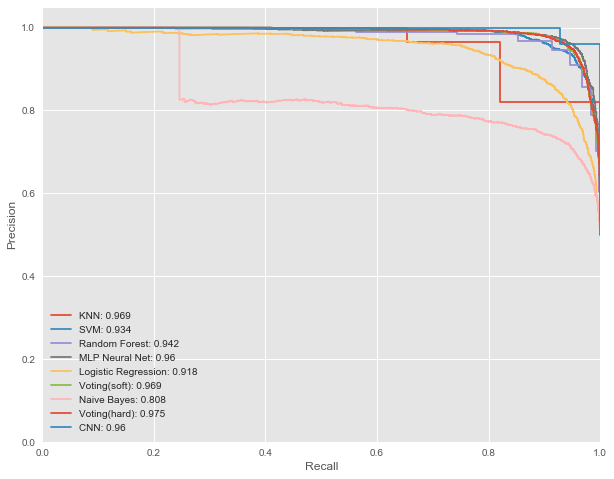

In [752]:

from sklearn.metrics import precision_score
CNN_precision, CNN_recall, _ = precision_recall_curve(g, t)
plt.figure(figsize=(10,8))
#plt.plot([0,1.05], [0,1.05], ls = '--')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.00])
plt.step(knn_recall, knn_precision, label = 'KNN: ' + str(np.around(precision_score(y_ts, np.around(knn_preds)), decimals=3)))
plt.step(svm_recall, svm_precision, label = 'SVM: ' +  str(np.around(precision_score(y_ts, np.around(svm_preds)), decimals=3)))
plt.step(rf_recall, rf_precision, label = 'Random Forest: ' + str(np.around(precision_score(y_ts, np.around(rf_preds)), decimals=3)))
plt.step(mlpnn_recall, mlpnn_precision, label = 'MLP Neural Net: ' +  str(np.around(precision_score(y_ts, np.around(mlpnn_preds)), decimals=3)))
plt.step(logreg_recall, logreg_precision, label='Logistic Regression: ' + str(np.around(precision_score(y_ts, np.around(logreg_preds)), decimals=3)))
plt.step(ensemble_soft_recall, ensemble_soft_precision, label='Voting(soft): '+ str(np.around(precision_score(y_ts, np.around(ensemble_soft_pred)), decimals=3)))
plt.step(bayes_recall, bayes_precision, label = 'Naive Bayes: ' + str(np.around(precision_score(y_ts, np.around(bayes_preds)), decimals=3)))
plt.step(ensemble_hard_recall, ensemble_hard_precision, label='Voting(hard): ' + str(np.around(precision_score(y_ts, np.around(ensemble_hard_preds)), decimals=3)))
plt.step(CNN_recall, CNN_precision, label = 'CNN: '+ str(np.around(precision_score(g,t), decimals=3)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [700]:
ensemble_soft_pred

array([ 0.495,  0.182,  0.017, ...,  0.895,  0.603,  0.973])

In [701]:
precision_score(y_ts, np.around(ensemble_soft_pred))

0.969254820218864

In [450]:
from sklearn.metrics import classification_report
target_name = ['Ellipse', 'Spiral']
classification_report(y_ts, np.around(knn_preds), target_names = target_name)

str

In [900]:
def classifaction_reporting(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    return dataframe
knn_report = classifaction_reporting(classification_report(y_ts, np.around(knn_pred), target_names = target_name))
knn_report['Model'] = 'KNN'
svm_report = classifaction_reporting(classification_report(y_ts, np.around(svm_pred), target_names= target_name))
svm_report['Model'] = 'SVM'
bayes_report = classifaction_reporting(classification_report(y_ts, np.around(bayes_pred), target_names=target_name))
bayes_report['Model'] = 'GNB'
logistic_report = classifaction_reporting(classification_report(y_ts, np.around(logreg_pred), target_names = target_name))
logistic_report['Model'] = 'Logistic Regression'
RF_report = classifaction_reporting(classification_report(y_ts, np.around(rf_pred), target_names = target_name))
RF_report['Model'] = 'Random Forest'
MLP_report = classifaction_reporting(classification_report(y_ts, np.around(mlpnn_pred), target_names = target_name))
MLP_report['Model'] = 'MLP'
soft_report = classifaction_reporting(classification_report(y_ts, np.around(ensemble_soft_pred), target_names = target_name))
soft_report['Model'] = 'Soft'
hard_report = classifaction_reporting(classification_report(y_ts, np.around(ensemble_hard_pred), target_names = target_name))
hard_report['Model'] = 'Hard'
CNN_report = classifaction_reporting(classification_report(g, t, target_names = target_name))
CNN_report['Model'] = 'CNN'


In [902]:
pd.DataFrame(pd.concat([knn_report, svm_report, bayes_report, logistic_report, RF_report, MLP_report, soft_report,hard_report, CNN_report]).set_index('Model', append = True).swaplevel(0,1))

class  f1_score  precision  recall  support
Model                                                                   
KNN                 0      Ellipse      0.84       0.74    0.98   1991.0
                    1       Spiral      0.78       0.96    0.65   2009.0
SVM                 0      Ellipse      0.94       0.95    0.94   1991.0
                    1       Spiral      0.94       0.94    0.95   2009.0
GNB                 0      Ellipse      0.77       0.70    0.84   1991.0
                    1       Spiral      0.72       0.80    0.65   2009.0
Logistic Regression 0      Ellipse      0.89       0.87    0.90   1991.0
                    1       Spiral      0.88       0.90    0.86   2009.0
Random Forest       0      Ellipse      0.93       0.92    0.94   1991.0
                    1       Spiral      0.93       0.94    0.91   2009.0
MLP                 0      Ellipse      0.96       0.95    0.96   1991.0
                    1       Spiral      0.96       0.96    0.95   2009.0
Soft                0      Ellipse      0.95       0.93    0.97   1991.0
                    1       Spiral      0.95       0.97    0.93   2009.0
Hard                0      Ellipse      0.95       0.93    0.97   1991.0
                    1       Spiral      0.95       0.97    0.93   2009.0
CNN                 0      Ellipse      0.95       0.93    0.96   2000.0
                    1       Spiral      0.94       0.96    0.93   2000.0

In [589]:
#pd.DataFrame(pd.concat([knn_report, svm_report, bayes_report, RF_report, MLP_report, soft_report,hard_report, CNN_report]).set_index('Model', append = True).swaplevel(0,1))

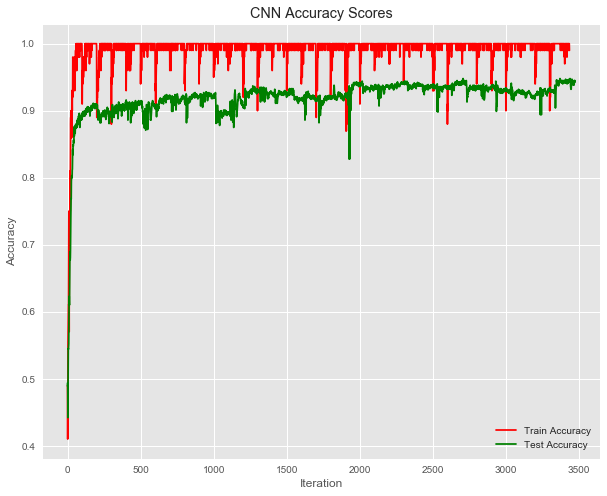

In [379]:
os.chdir('/Users/nimamaghoul/Desktop/1222bestest/')
r = pd.read_csv('Bestestcleaned1222.csv')
r.Train = r.Train.str.replace('%','')
r.Train = r.Train.str.replace('\xc2\xa0 ', '')
r.Train = pd.to_numeric(r.Train)/100
r.Test = r.Test.str.replace('%','')
r.Test = pd.to_numeric(r.Test)/100
r['iteration'] = np.arange(len(r))
r.head()

plt.figure(figsize=(10,8))
plt.plot(r.iteration, r.Train, color = 'r', label = 'Train Accuracy')
plt.plot(r.iteration, r.Test, color = 'g', label = 'Test Accuracy')
plt.title('CNN Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
len(r)

Normalized confusion matrix
[[ 0.962  0.038]
 [ 0.072  0.927]]
Normalized confusion matrix
[[ 0.962  0.038]
 [ 0.072  0.927]]


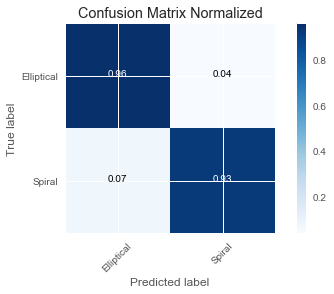

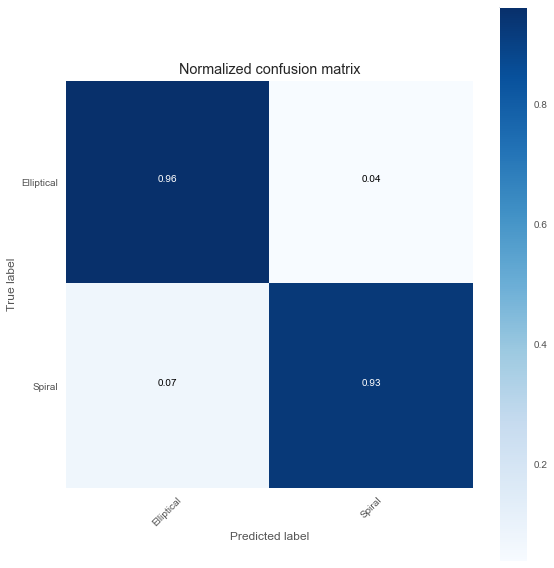

In [380]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix

cnf_matrix = np.array([[1923 ,77],[ 145, 1855]])
class_names = ['Elliptical', 'Spiral']
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='Confusion Matrix Normalized', normalize=True)

# Plot normalized confusion matrix
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.grid('off')

In [382]:
g = np.append(np.zeros(2000),np.ones(2000))

In [385]:
t = np.append(np.append(np.zeros(1923),np.ones(77)),np.append(np.zeros(145), np.ones(1855)) )
t

array([ 0.,  0.,  0., ...,  1.,  1.,  1.])

In [299]:
X_train_RGB_sum = []
for i in range(len(X_train)):
    X_train_RGB_sum.append(np.ravel(np.sum(np.uint8(X_train[i].reshape(100,100,3)), axis = 2)))

In [300]:
from sklearn.decomposition import PCA
pca_sum95 = PCA(n_components=0.95)
pca_sum2 = PCA(n_components=2)
X_sum095 = pca_sum95.fit_transform(X_train_RGB_sum)


In [301]:
X_sum095.shape

(20000, 64)

In [302]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

svmrbf = SVC(kernel='rbf')
for i in range(5):
    
    Xtrr, Xtss, ytrr, ytss = train_test_split(X_sum095, y_train, test_size = 0.2, random_state = np.random.choice(10^9))
    svmrbf.fit(Xtrr, ytrr)
    print(svmrbf.score(Xtss, ytss))

0.48875
0.4985
0.4985
0.4925
0.48875


In [ ]:
pca16 = PCA(n_components=16)
X_train16 = pca16.fit(X_train)
svmrbf.fit(X_ttrain)